In [191]:
pip install --upgrade scikit-learn


In [192]:
pip show scikit-learn --version

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


#Telecom Customer Churn Prediction Model

**Project Background** : The Telecommunications companies faces challenges with customer churn rates higher the 10% annually.**To address this issue, the project aims to develop a classification model to predict customer churn based on individual features.**The goal is to leverage this data to create a predictive model that can help the company identify customers at risk of churning and implement retention strategies effectively.

The data set includes the following variables:
* state: Categorical, for the 51 states and the District of Columbia.
* Area.code
* account.length: how long the account has been active.
* voice.plan: yes or no, voicemail plan.
* voice.messages: number of voicemail messages.
* intl.plan: yes or no, international plan.
* intl.mins: minutes customer used service to make international calls.
* intl.calls: total number of international calls.
* intl.charge: total international charge.
* day.mins: minutes customer used service during the day.
* day.calls: total number of calls during the day.
* day.charge: total charge during the day.
* eve.mins: minutes customer used service during the evening.
* eve.calls: total number of calls during the evening.
* eve.charge: total charge during the evening.
* night.mins: minutes customer used service during the night.
* night.calls: total number of calls during the night.
* night.charge: total charge during the night.
* customer.calls: number of calls to customer service.
* churn(**Target**): Categorical, yes or no. Indicator of whether the customer has left the company (yes or no).


#Importing the libraries

In [193]:
#!pip install category_encoders --quiet

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score

In [195]:
pd.set_option('display.max_columns',None)

# 1.Load the dataset

####Load the Raw-data    -> Data integration

In [196]:
#from google.colab import drive
#drive.mount('/content/drive')

In [197]:
df = pd.read_csv(r"/content/source_data.csv")

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

* The  [day.charge ,eve.mins] columns are numerical values but are in object dtypes.So, we are changing them to { float } dtype  values(NUMERICAL VARIABLES).



#### All Data Types are mentioned correctly.

In [199]:
column_dict = {"day.charge":float ,"eve.mins" :float}
df=df.astype(column_dict)                                 # pd.astype("dict")          ->  returns the new df with changed dtypes

In [200]:
df.select_dtypes(include='object')                        # Categorical variables

,state,area.code,voice.plan,intl.plan,churn
0,KS,area_code_415,yes,no,no
1,OH,area_code_415,yes,no,no
2,NJ,area_code_415,no,no,no
3,OH,area_code_408,no,yes,no
4,OK,area_code_415,no,yes,no
...,...,...,...,...,...
4995,HI,area_code_408,yes,no,no
4996,WV,area_code_415,no,no,yes
4997,DC,area_code_415,no,no,no
4998,DC,area_code_510,no,no,no


* churn (yes || no) is the target output.

In [201]:
df.select_dtypes(include=['int64','float64'])             #Numerical variables

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,1,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1
1,2,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1
2,3,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0
3,4,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2
4,5,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2
4996,4997,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3
4997,4998,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1
4998,4999,109,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0


# 2.Data Exploration -- Summary

####Descriptive Statistics

In [202]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5000.0,2500.500000,1443.520003,1.0,1250.750,2500.50,3750.25,5000.00
account.length,5000.0,100.258600,39.694560,1.0,73.000,100.00,127.00,243.00
voice.messages,5000.0,7.755200,13.546393,0.0,0.000,0.00,17.00,52.00
intl.mins,5000.0,10.261780,2.761396,0.0,8.500,10.30,12.00,20.00
intl.calls,5000.0,4.435200,2.456788,0.0,3.000,4.00,6.00,20.00
intl.charge,5000.0,2.771196,0.745514,0.0,2.300,2.78,3.24,5.40
day.mins,5000.0,180.288900,53.894699,0.0,143.700,180.10,216.20,351.50
day.calls,5000.0,100.029400,19.831197,0.0,87.000,100.00,113.00,165.00
day.charge,4993.0,30.653501,9.166356,0.0,24.430,30.62,36.75,59.76
eve.mins,4976.0,200.580326,50.554637,0.0,166.275,201.00,234.10,363.70


In [203]:
df.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,5000.0,NaN,NaN,NaN,2500.5,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
state,5000,51,WV,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area.code,5000,3,area_code_415,2495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account.length,5000.0,NaN,NaN,NaN,100.2586,39.69456,1.0,73.0,100.0,127.0,243.0
voice.plan,5000,2,no,3677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
voice.messages,5000.0,NaN,NaN,NaN,7.7552,13.546393,0.0,0.0,0.0,17.0,52.0
intl.plan,5000,2,no,4527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intl.mins,5000.0,NaN,NaN,NaN,10.26178,2.761396,0.0,8.5,10.3,12.0,20.0
intl.calls,5000.0,NaN,NaN,NaN,4.4352,2.456788,0.0,3.0,4.0,6.0,20.0
intl.charge,5000.0,NaN,NaN,NaN,2.771196,0.745514,0.0,2.3,2.78,3.24,5.4


* State has 51 unique values while area_code has 3 unique values . What is the relation ?
* Units for account length ?

In [204]:
df.isnull().sum()

Unnamed: 0         0
state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [205]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [206]:
df['area.code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      4993 non-null   float64
 13  eve.mins        4976 non-null   float64
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

* All the columns data types are correctly identified

#EDA START

#### In Data Analysis we will analyze to find out the below stuff
+ Missing values
+ All the Numerical Variables
+ Distribution of the Numerical Variables
+ Categorical Variables
+ Cardinality of Categorical Variables
+ Outliers
+ Relationshop between independent and dependent feature (Target)

In [208]:
# print shape of dataset with rows and columns
print(df.shape)
# print top 5 records
df.head()

(5000, 21)


,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


####2.1 Missing values

* ***There are no missing values in categorical values***

In [209]:
df[(df['voice.plan'] == '') | (df['intl.plan'] == '') | (df['churn'] == '') | (df['state'] == '')|(df['area.code'] == '')]

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn


In [210]:
df.isnull().sum()

Unnamed: 0         0
state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

[ Day.charge , eve.calls ] has missing values.

In [211]:
(df.isnull().sum()/len(df))*100

Unnamed: 0        0.00
state             0.00
area.code         0.00
account.length    0.00
voice.plan        0.00
voice.messages    0.00
intl.plan         0.00
intl.mins         0.00
intl.calls        0.00
intl.charge       0.00
day.mins          0.00
day.calls         0.00
day.charge        0.14
eve.mins          0.48
eve.calls         0.00
eve.charge        0.00
night.mins        0.00
night.calls       0.00
night.charge      0.00
customer.calls    0.00
churn             0.00
dtype: float64

#### The percentage of missing values in the data is less than 0.5 % of the entire data .

In [212]:
df.sort_values(by ='day.charge',na_position='first').head(10)                   #sort_values

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
12,13,IA,area_code_408,168,no,0,no,11.2,2,3.02,128.8,96,NaN,104.9,71,8.92,141.1,128,6.35,1,no
27,28,MT,area_code_408,54,no,0,no,14.7,4,3.97,134.3,73,NaN,155.5,100,13.22,102.1,68,4.59,3,no
47,48,DE,area_code_408,142,no,0,no,7.4,5,2.00,187.0,133,NaN,134.6,74,11.44,242.2,127,10.90,2,no
4407,4408,TN,area_code_415,125,no,0,no,7.7,3,2.08,138.5,96,NaN,159.7,117,13.57,212.7,91,9.57,2,no
4755,4756,OK,area_code_408,17,no,0,no,14.8,5,4.00,180.4,121,NaN,228.5,111,19.42,199.5,99,8.98,0,no
4965,4966,NC,area_code_408,92,no,0,no,10.7,2,2.89,192.1,87,NaN,193.0,122,16.41,133.4,79,6.00,1,no
4992,4993,MT,area_code_415,83,no,0,no,10.3,6,2.78,188.3,70,NaN,243.8,88,20.72,213.7,79,9.62,0,no
1397,1398,VT,area_code_510,101,no,0,no,7.2,4,1.94,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,1,no
1345,1346,SD,area_code_415,98,no,0,no,6.8,1,1.84,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,4,yes
2736,2737,OK,area_code_510,127,yes,27,no,9.2,5,2.48,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,3,no


* There are 3 different types of Missing data that can be encountered.
1. MCAR ( Missing Completley At Random ) : The missing data is completly at random and is distributed randomly accross the data range ,not limiting to one specific range and is feature which has missing values not related/can be dependent to another feature .
2. MAR (Missing At Random ) : The missing data is observed randomly on the data and feature which has the dependency to another feature in the data.
3. MNAR (Missing Not At Random ) : The missing data is here , caused by a relationship between missing values of the data and observed values in the data itself.

* The feature day.charge has NULL values and the values are dependent on features day.mins and day.charge .So, it is MAR (Missing at Random )  

In [213]:
df.sort_values(by ='eve.mins',na_position='first')                              #sort_values

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
89,90,NJ,area_code_415,128,no,0,no,13.9,4,3.75,237.9,125,40.44,NaN,93,21.05,208.9,68,9.40,1,yes
102,103,VT,area_code_415,135,no,0,no,10.5,6,2.84,151.7,82,25.79,NaN,105,10.12,180.0,100,8.10,0,no
110,111,MI,area_code_408,120,no,0,no,8.3,8,2.24,165.0,100,28.05,NaN,83,26.96,119.2,86,5.36,1,no
159,160,FL,area_code_510,115,yes,24,no,9.6,4,2.59,142.1,124,24.16,NaN,129,15.59,164.8,114,7.42,1,no
231,232,OH,area_code_415,63,yes,36,yes,11.0,6,2.97,199.0,110,33.83,NaN,111,24.76,197.6,92,8.89,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4564,4565,TX,area_code_510,145,no,0,no,6.2,6,1.67,158.8,120,27.00,352.1,145,29.93,177.6,140,7.99,2,no
2551,2552,MD,area_code_415,102,no,0,no,10.9,3,2.94,129.5,56,22.02,354.2,118,30.11,145.5,93,6.55,1,no
4892,4893,IN,area_code_510,63,no,0,no,5.6,3,1.51,6.6,107,1.12,359.3,142,30.54,252.5,131,11.36,0,no
2331,2332,IN,area_code_415,46,yes,34,no,7.2,2,1.94,191.4,102,32.54,361.8,96,30.75,147.5,132,6.64,1,no



* The feature eve.mins has NULL values and the values are dependent on features eve.calls and eve.charge .So, it is MAR (Missing at Random )  

In [214]:
df=df.dropna()

In [215]:
df.isnull().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

* The null values have been dropped .

#### 2.2 Duplicated values

In [216]:
df[df.duplicated()]

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn


* There are no duplicates in the data frame.

In [217]:
df.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

* Feature Engineering prospects :
** day.charge, day.min ,day.calls --->"day charge per min" and "day charge per call"
* Simlarly , for the Eveing , Night ,International categories

In [218]:
num_cols = df.select_dtypes(include = np.number).columns
num_cols                                                # Numerical feature columns

Index(['Unnamed: 0', 'account.length', 'voice.messages', 'intl.mins',
       'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'day.charge',
       'eve.mins', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls',
       'night.charge', 'customer.calls'],
      dtype='object')

In [219]:
cat_cols = df.select_dtypes(include ='object').columns
cat_cols                                                 # Categorical feature columns

Index(['state', 'area.code', 'voice.plan', 'intl.plan', 'churn'], dtype='object')

#### 2.3 Univarite analysis : Analyzing the variables using one feature at a time.

In [220]:
def outliers (df,ft):
    outlier_dict = {}
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR= Q3-Q1

    LOWER_BOUND=Q1-1.5*IQR
    UPPER_BOUND=Q3+1.5*IQR

    ls=df.index[ (df[ft]< LOWER_BOUND) | (df[ft]> UPPER_BOUND) ]
    outlier_dict[ft]=ls
    return outlier_dict


In [221]:
index_list=[]
for feature in num_cols:
    index_list.append(outliers(df,feature))

In [222]:
index_list

[{'Unnamed: 0': Index([], dtype='int64')},
 {'account.length': Index([ 238,  309,  416,  817, 1045, 1093, 1387, 1408, 1551, 1751, 1886, 2150,
         2259, 2277, 2700, 3216, 3227, 4260, 4342, 4379, 4389, 4395, 4629, 4798],
        dtype='int64')},
 {'voice.messages': Index([  71,  149,  268,  277,  423,  599,  615,  790,  845,  872, 1269, 1285,
         1378, 1441, 1454, 1487, 1596, 1602, 1732, 1797, 1846, 1908, 2366, 2457,
         2570, 2608, 2686, 2716, 2768, 2887, 3154, 3165, 3174, 3246, 3279, 3342,
         3433, 3523, 3524, 3543, 3577, 3826, 3910, 4059, 4275, 4338, 4369, 4445,
         4502, 4516, 4588, 4625, 4706, 4713, 4717, 4777, 4778, 4824, 4859, 4933],
        dtype='int64')},
 {'intl.mins': Index([ 115,  179,  214,  225,  314,  343,  367,  397,  488,  502,  515,  535,
          595,  712,  762,  878, 1028, 1080, 1257, 1400, 1420, 1564, 1570, 1651,
         1816, 1966, 2004, 2180, 2197, 2229, 2238, 2256, 2345, 2362, 2371, 2513,
         2534, 2669, 2733, 2816, 2906, 2918, 2

In [223]:
def info(your_dict:dict)->None:
  for feature_name, indices_list in your_dict.items():
    global total_outliers
    total_outliers+=len(indices_list)
    print(f"The fetaure  '{feature_name}' has {len(indices_list)} outliers")

In [224]:
total_outliers = 0
for outlier_dict in index_list:
  info(outlier_dict)

print(f"The total number of outliers are {total_outliers}")

The fetaure  'Unnamed: 0' has 0 outliers
The fetaure  'account.length' has 24 outliers
The fetaure  'voice.messages' has 60 outliers
The fetaure  'intl.mins' has 71 outliers
The fetaure  'intl.calls' has 118 outliers
The fetaure  'intl.charge' has 71 outliers
The fetaure  'day.mins' has 34 outliers
The fetaure  'day.calls' has 35 outliers
The fetaure  'day.charge' has 34 outliers
The fetaure  'eve.mins' has 43 outliers
The fetaure  'eve.calls' has 34 outliers
The fetaure  'eve.charge' has 42 outliers
The fetaure  'night.mins' has 40 outliers
The fetaure  'night.calls' has 43 outliers
The fetaure  'night.charge' has 39 outliers
The fetaure  'customer.calls' has 398 outliers
The total number of outliers are 1086


In [225]:
Outliers_percent= (100*total_outliers )/len(df)
Outliers_percent

21.855504125578587

We cannot remove 21 % of data as outliers as we might loose important inforamtion on large scale .


There are too many outliers compared to size of avialble data.SO,At this point we are not removing it.


--------------

--------------

Unnamed: 0
skew :  -0.01


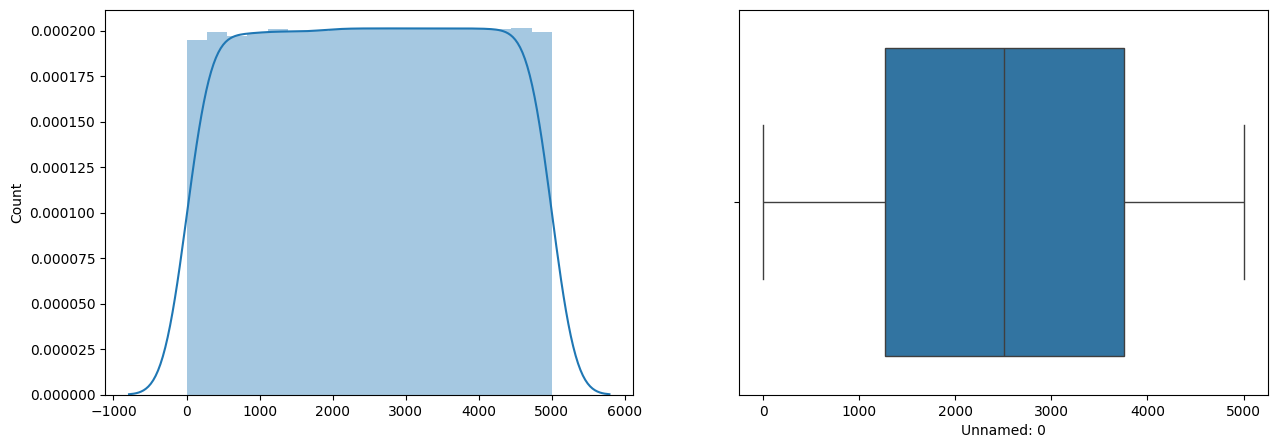

--------------

--------------

account.length
skew :  0.11


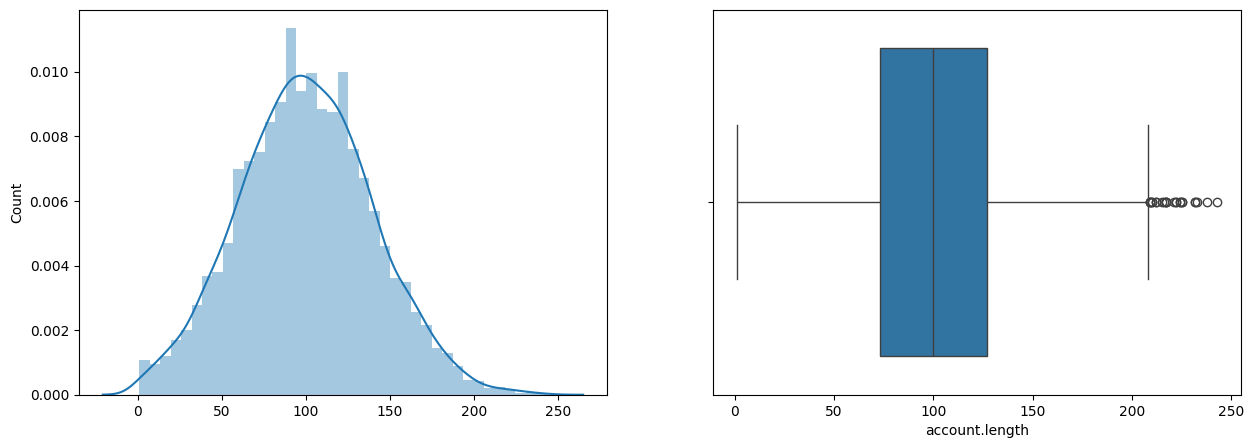

--------------

--------------

voice.messages
skew :  1.35


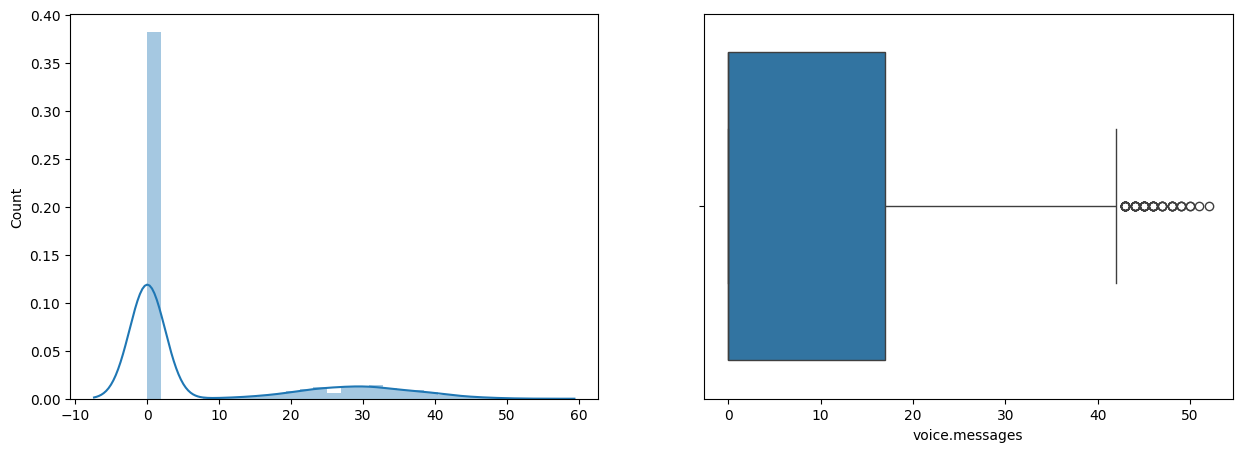

--------------

--------------

intl.mins
skew :  -0.21


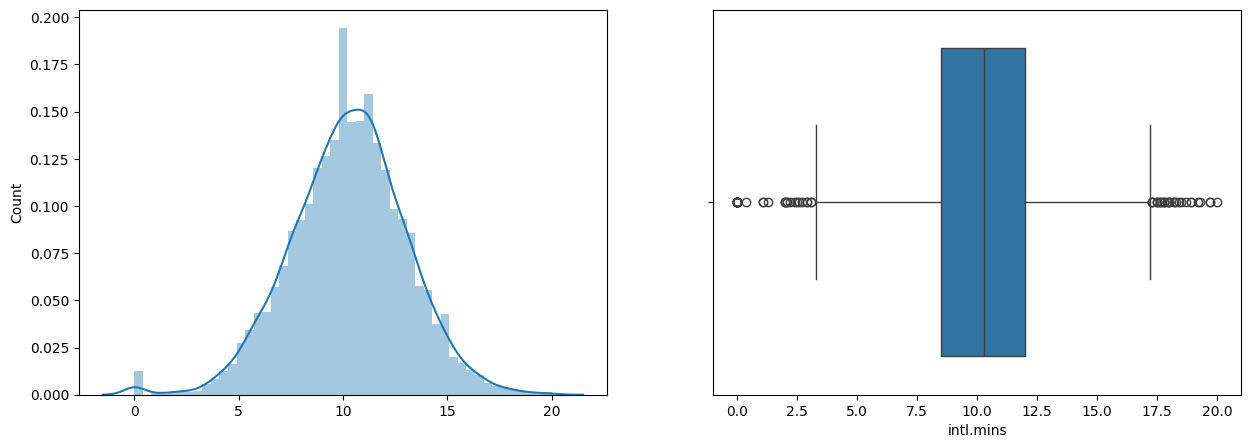

--------------

--------------

intl.calls
skew :  1.36


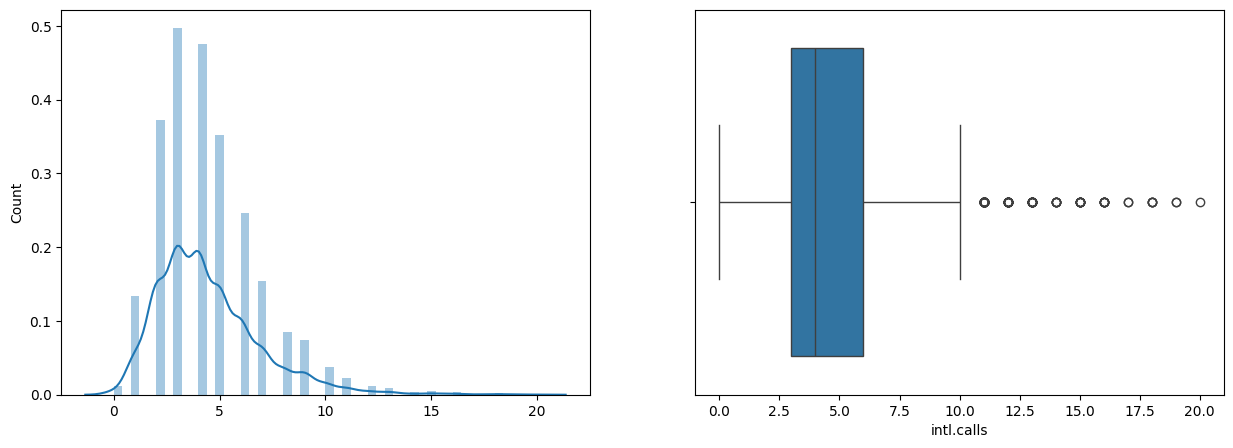

--------------

--------------

intl.charge
skew :  -0.21


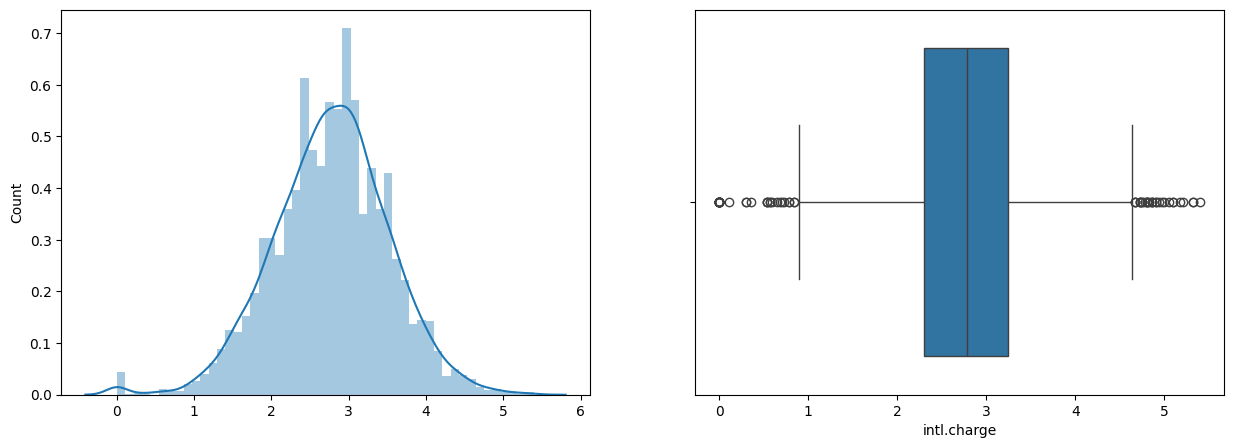

--------------

--------------

day.mins
skew :  -0.01


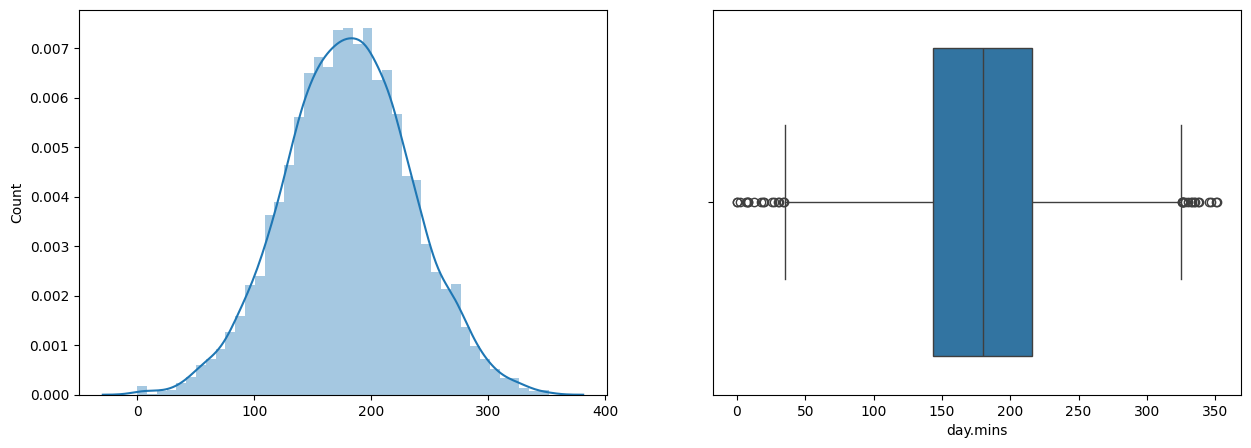

--------------

--------------

day.calls
skew :  -0.09


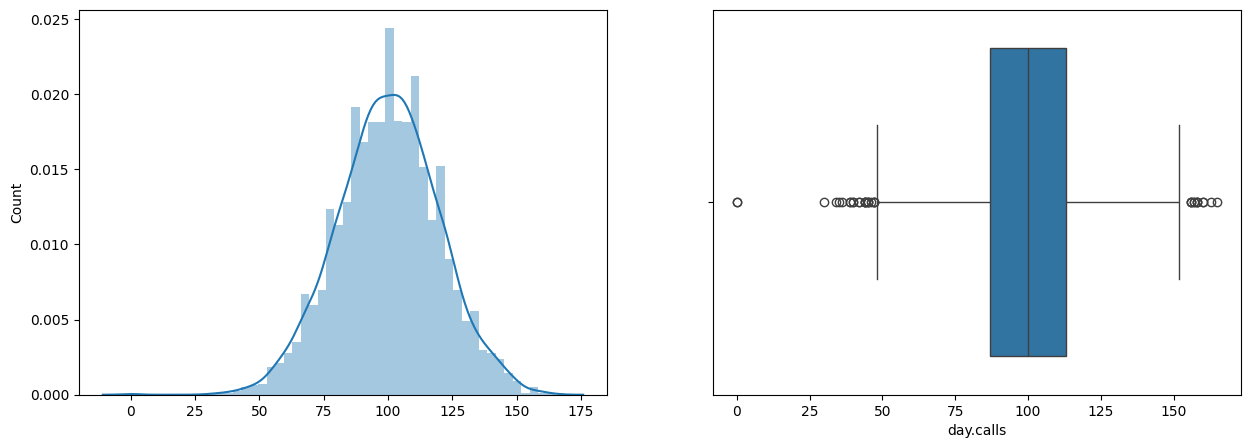

--------------

--------------

day.charge
skew :  -0.01


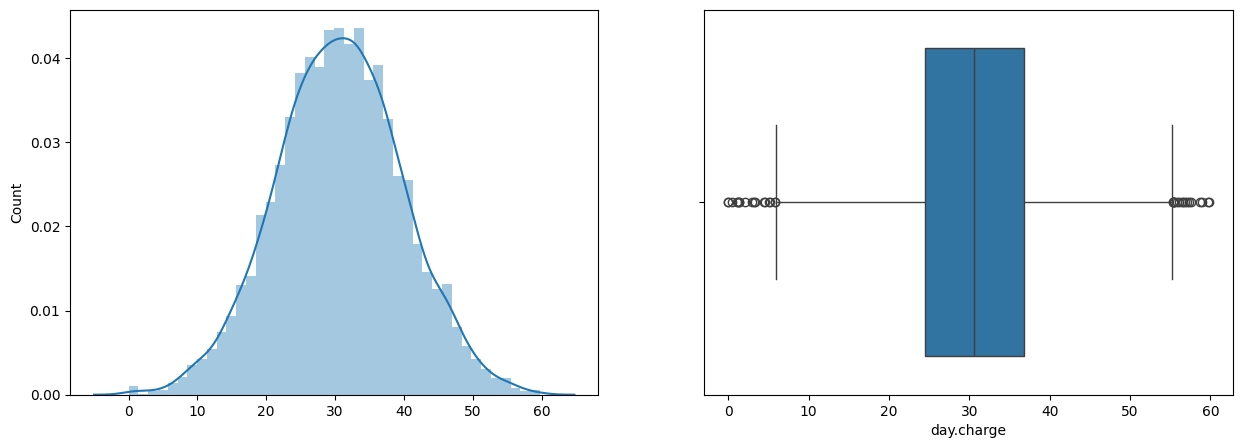

--------------

--------------

eve.mins
skew :  -0.01


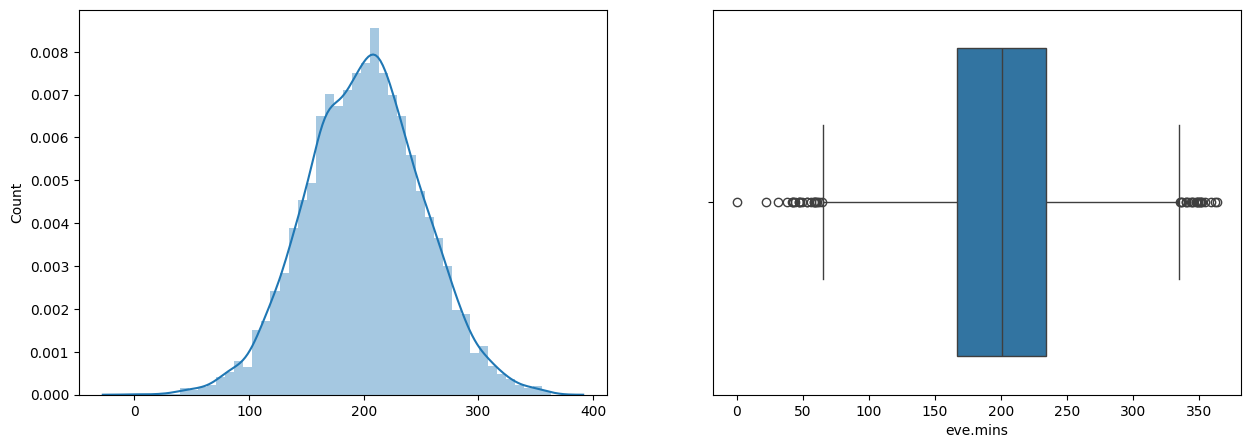

--------------

--------------

eve.calls
skew :  -0.02


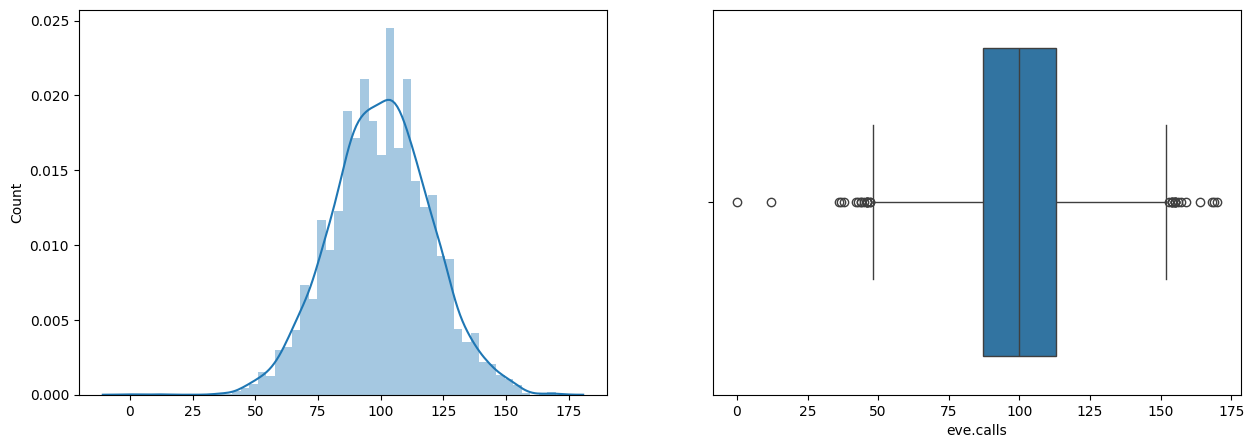

--------------

--------------

eve.charge
skew :  -0.01


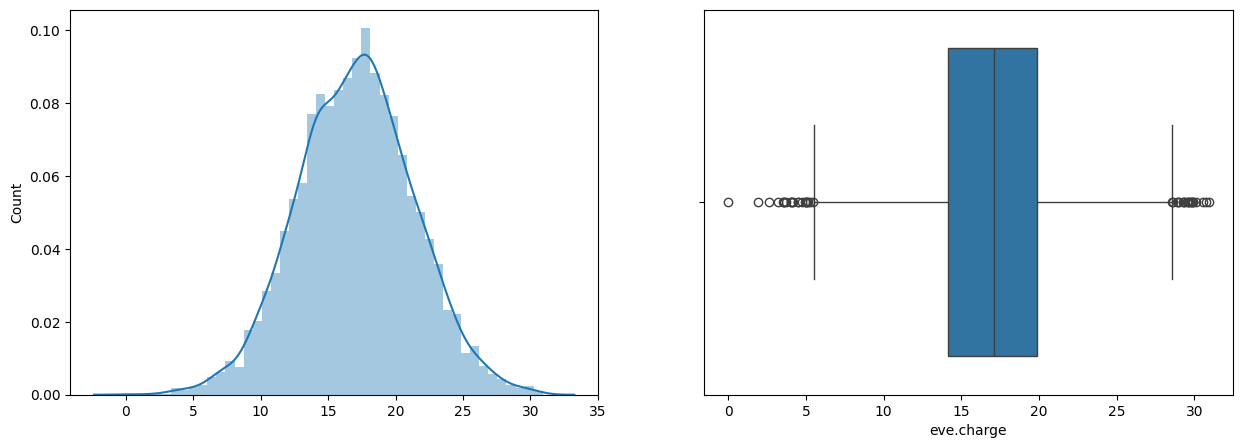

--------------

--------------

night.mins
skew :  0.02


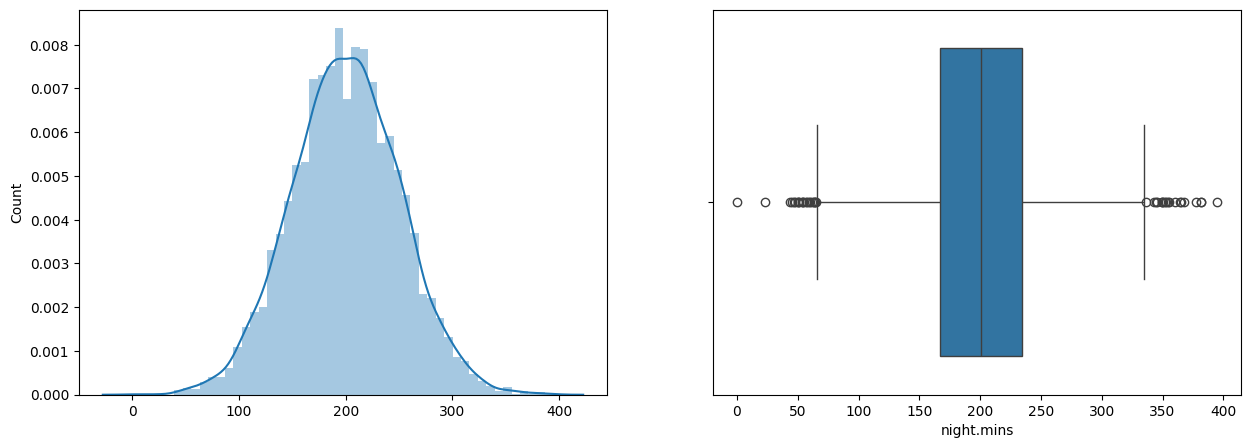

--------------

--------------

night.calls
skew :  0.0


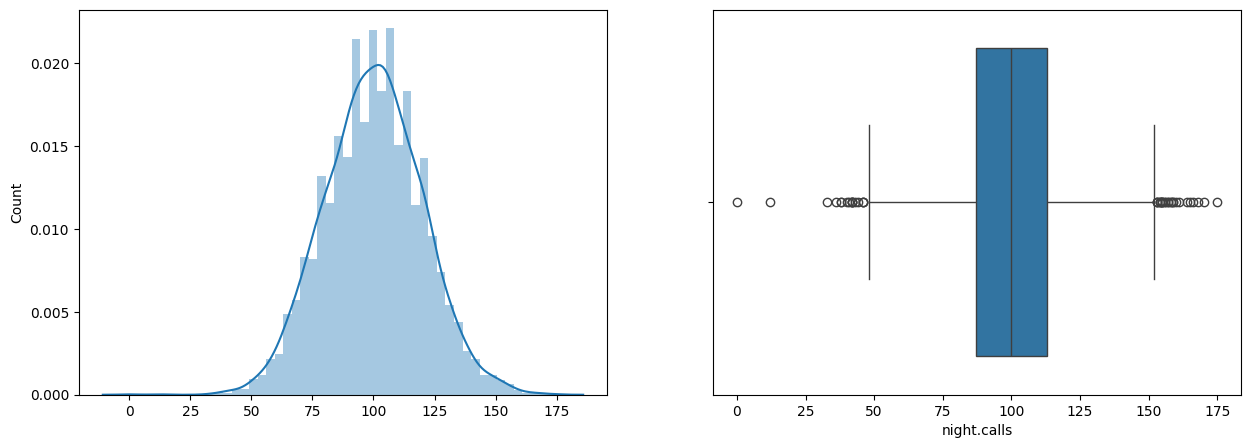

--------------

--------------

night.charge
skew :  0.02


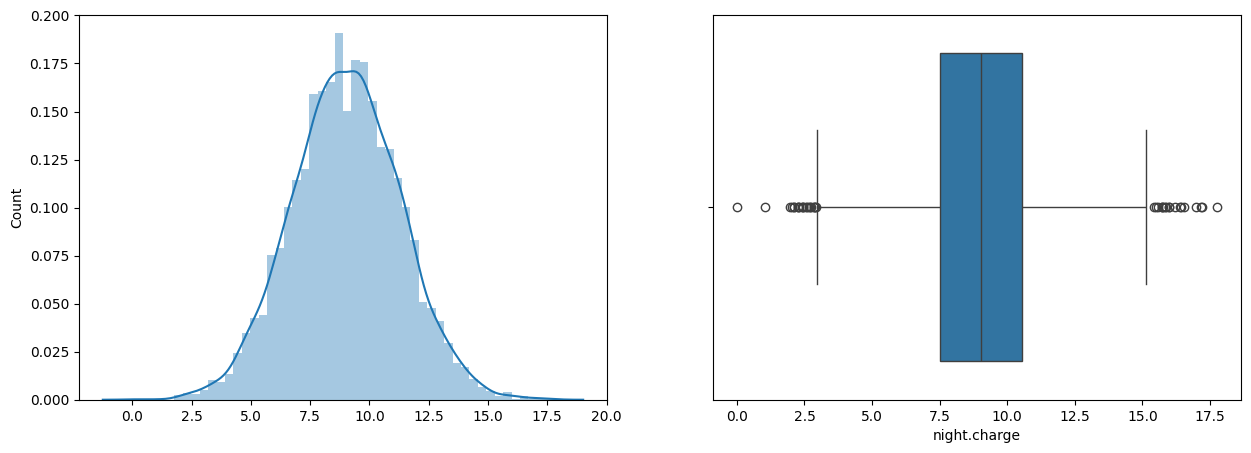

--------------

--------------

customer.calls
skew :  1.04


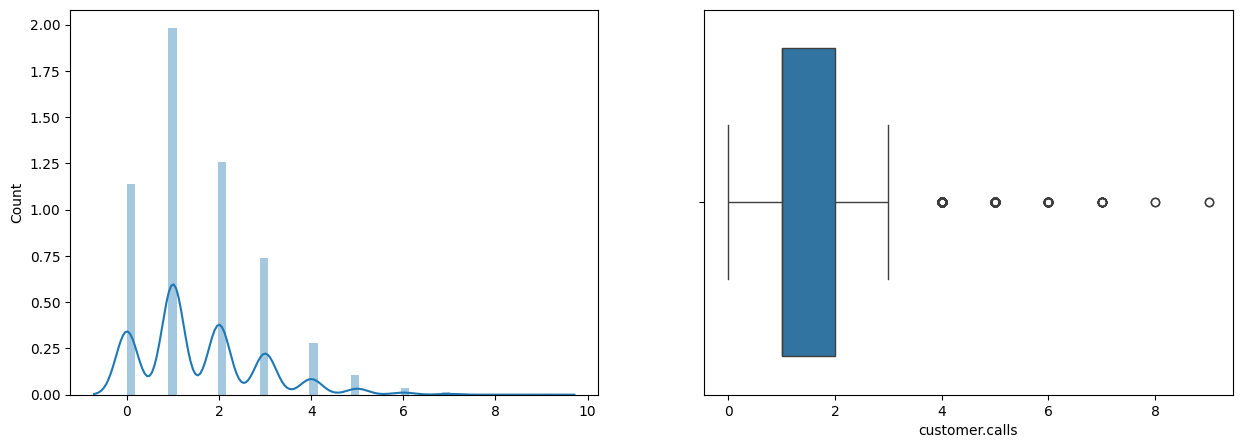

In [226]:
for col in num_cols:
  print("--------------\n")
  print("--------------\n")
  print(col)
  print('skew : ',round(df[col].skew(),2))
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.distplot(x=df[col],hist= True)                           # Frequency Distribution
  plt.ylabel("Count")
  plt.subplot(1,2,2)
  sns.boxplot(x=df[col])                              # Five Point Summary
  plt.show()

--------------

Feature:  Unnamed: 0
Skewness:  -0.01


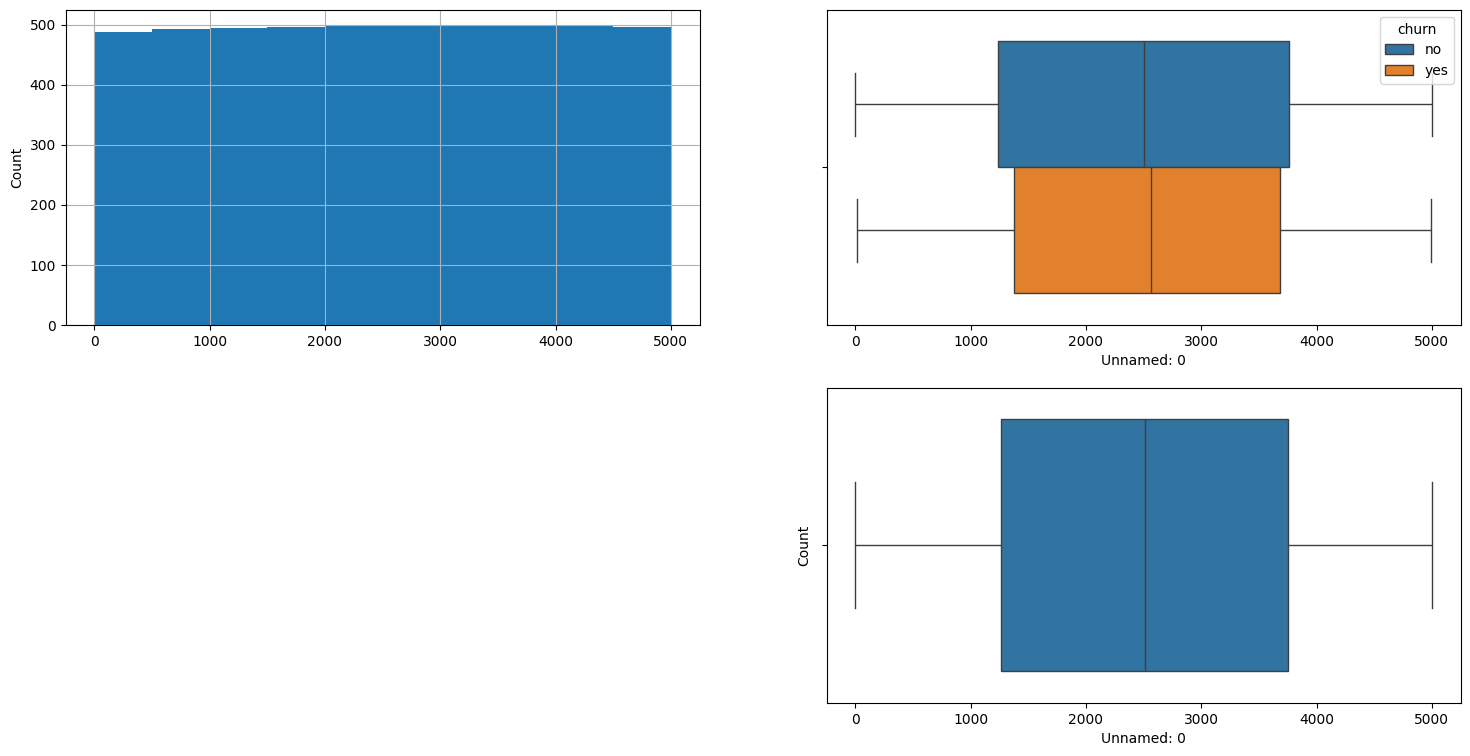

--------------

Feature:  account.length
Skewness:  0.11


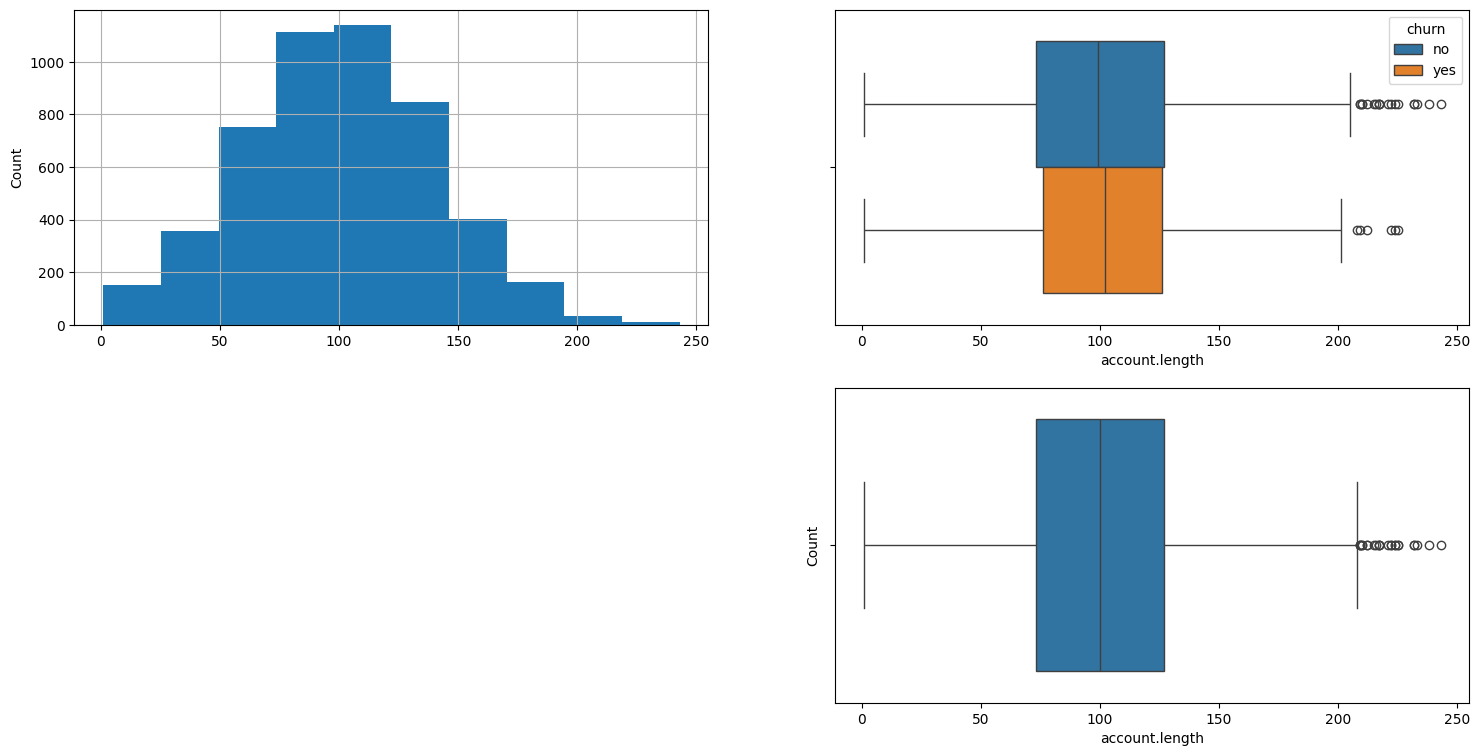

--------------

Feature:  voice.messages
Skewness:  1.35


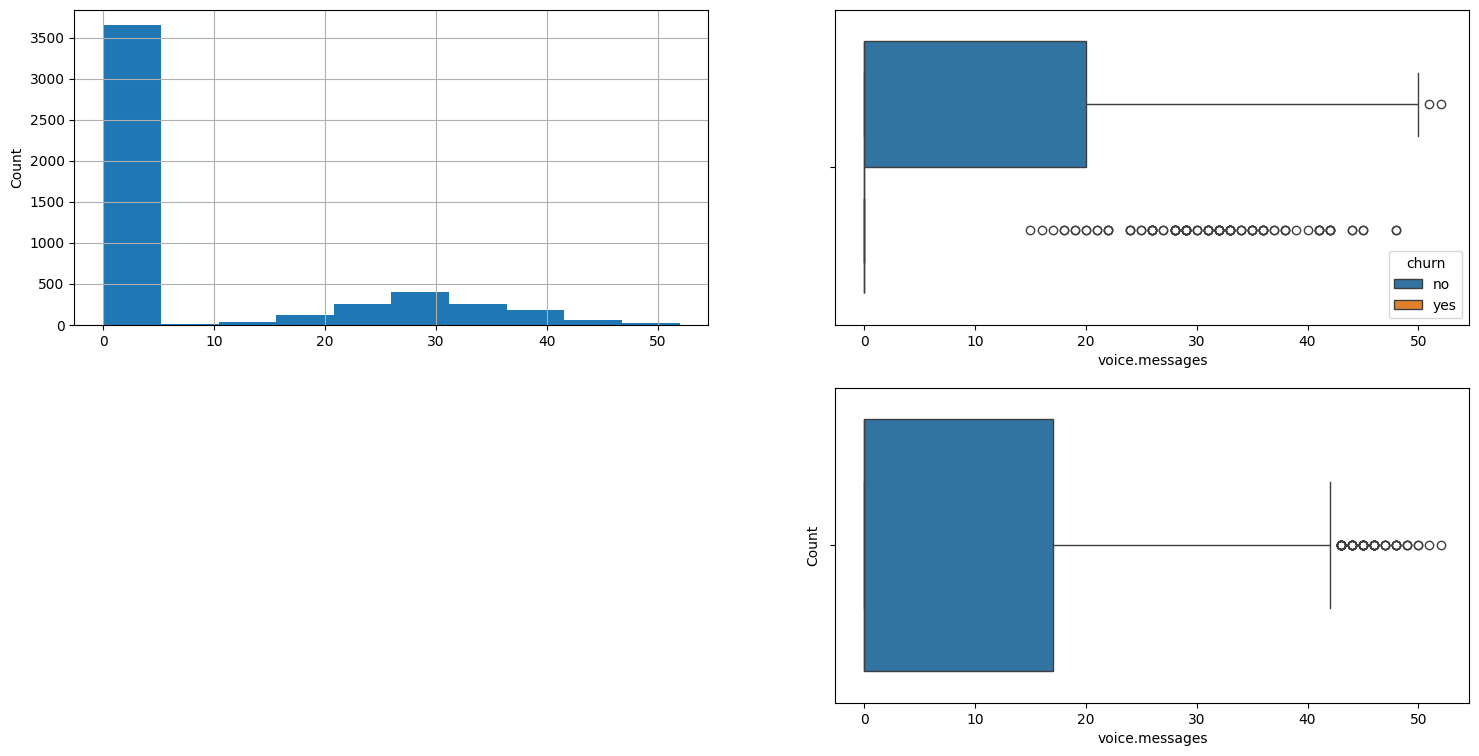

--------------

Feature:  intl.mins
Skewness:  -0.21


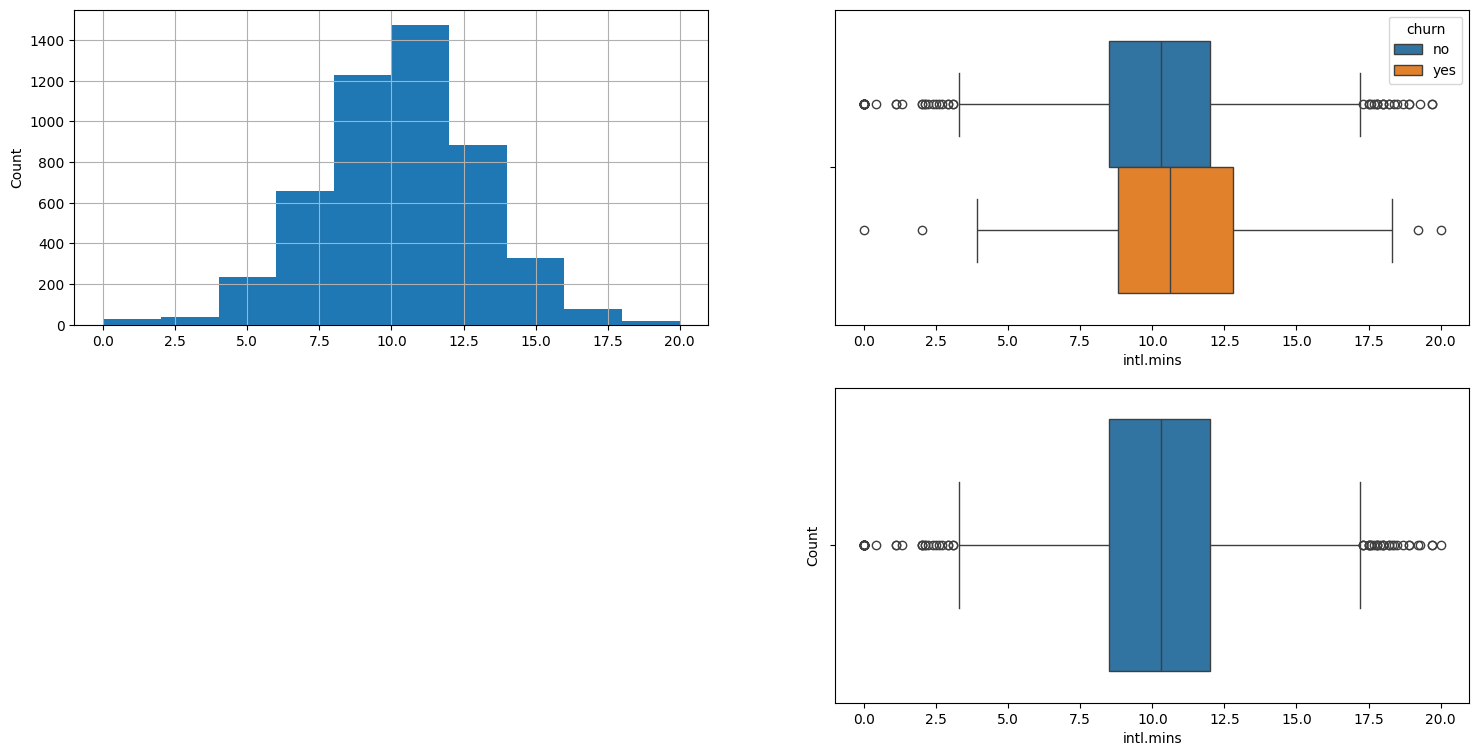

--------------

Feature:  intl.calls
Skewness:  1.36


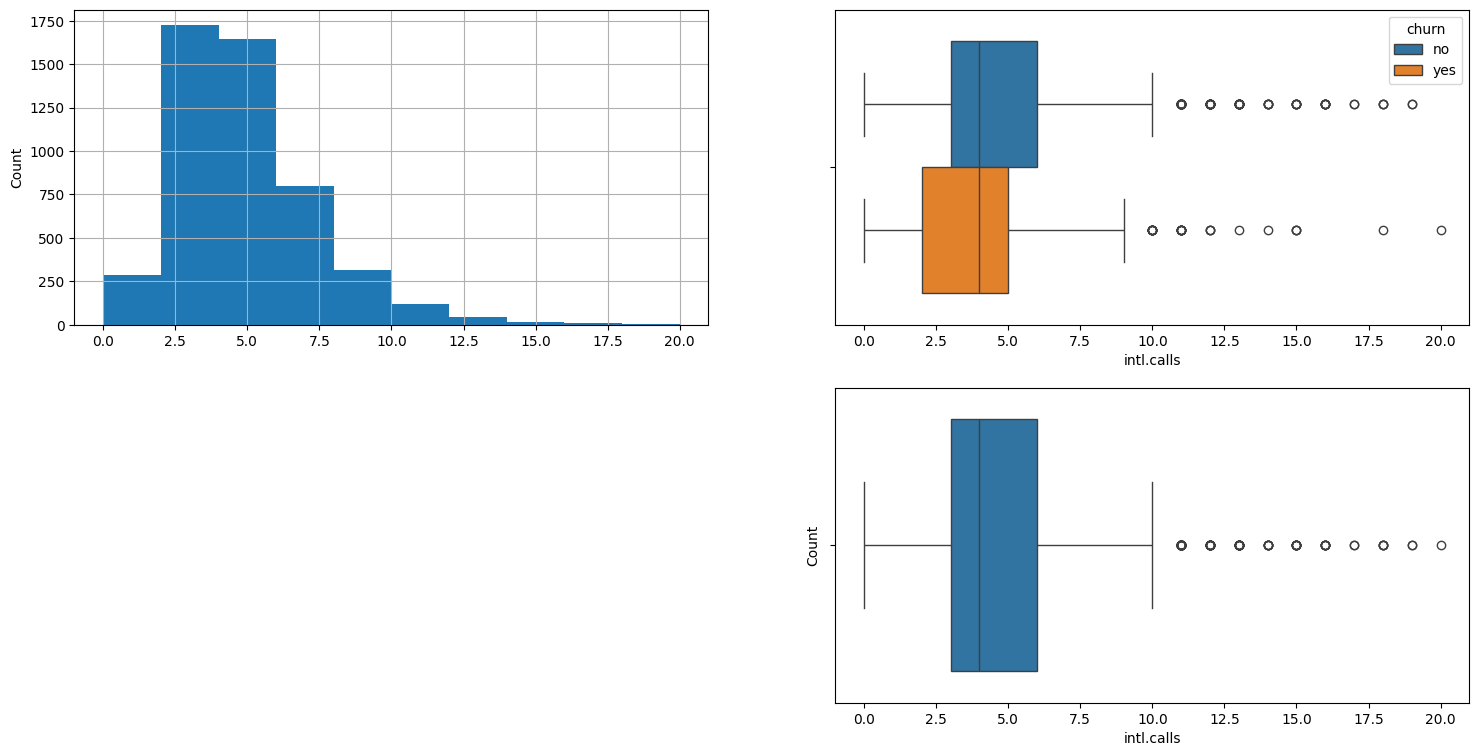

--------------

Feature:  intl.charge
Skewness:  -0.21


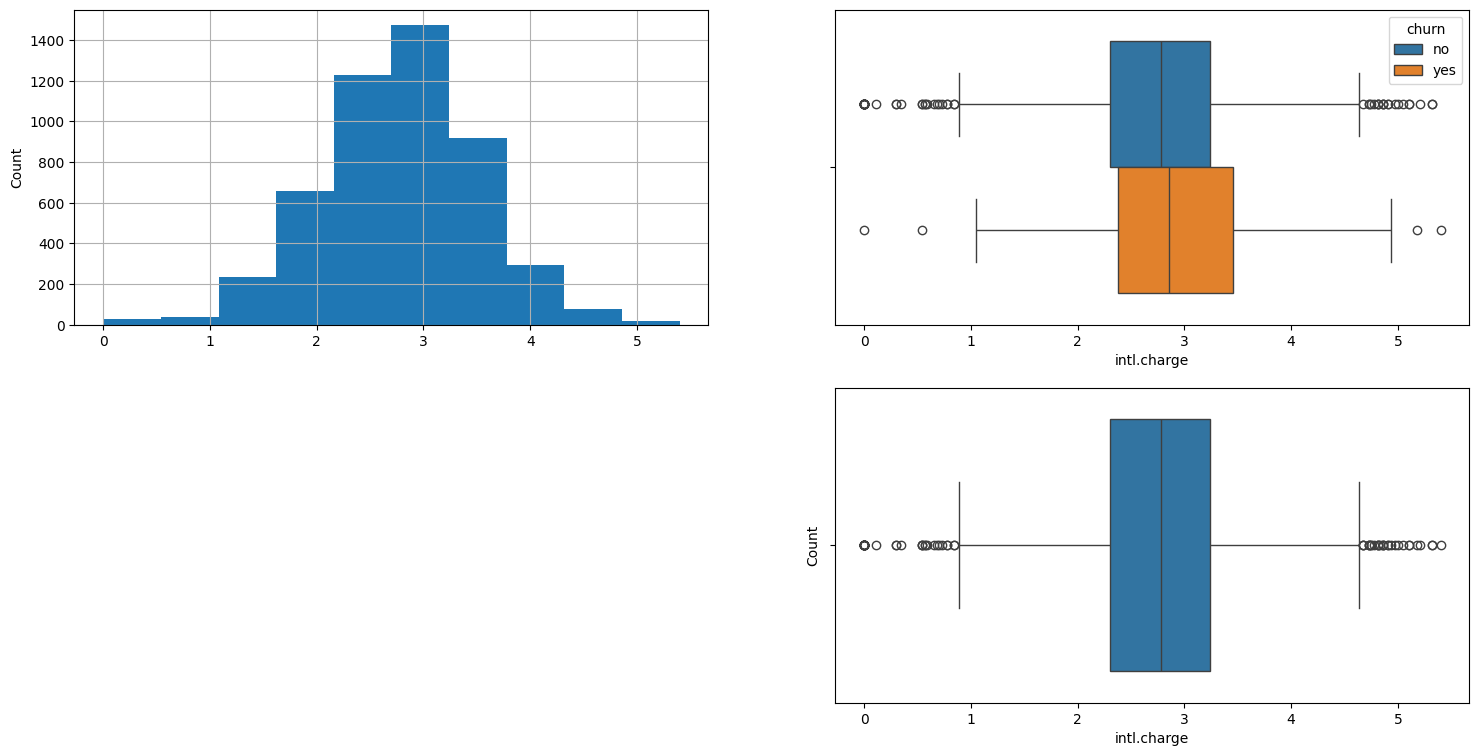

--------------

Feature:  day.mins
Skewness:  -0.01


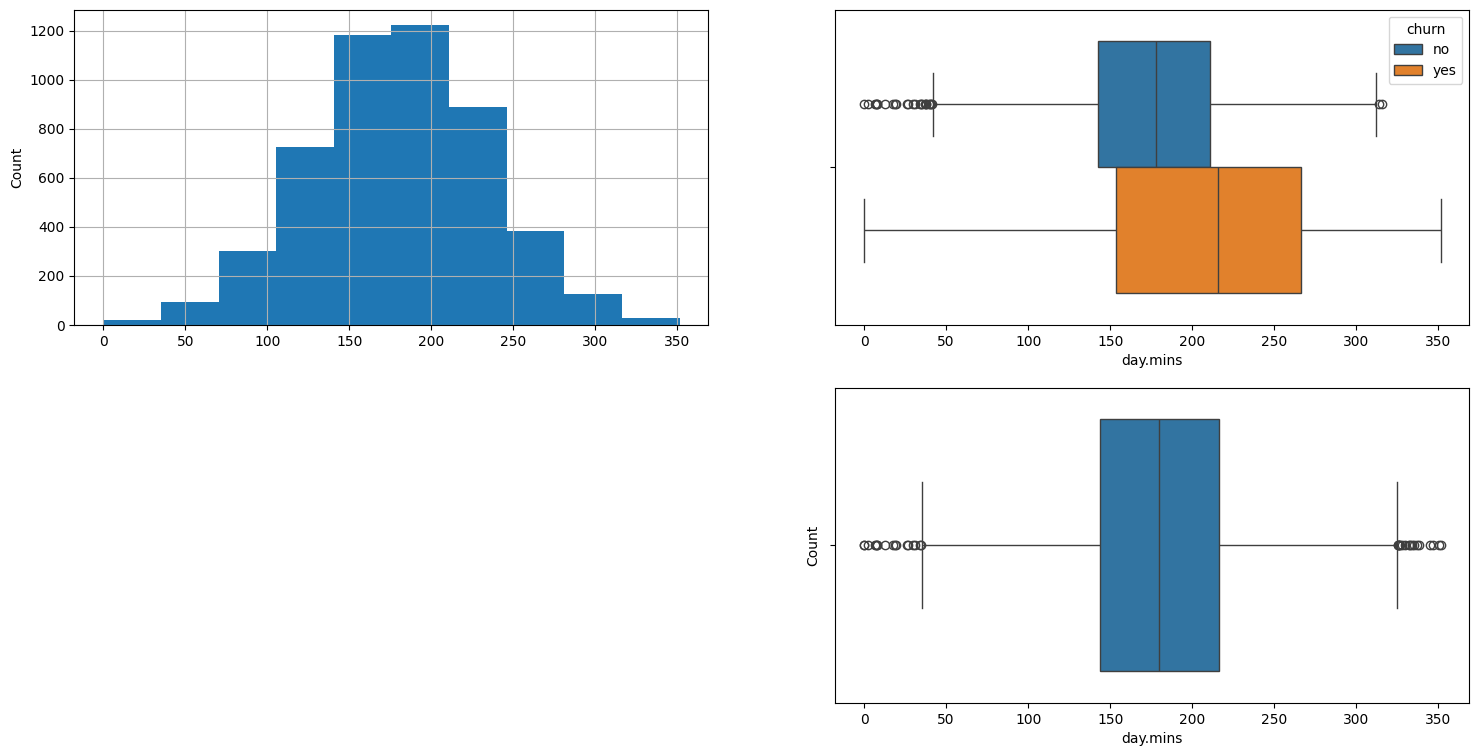

--------------

Feature:  day.calls
Skewness:  -0.09


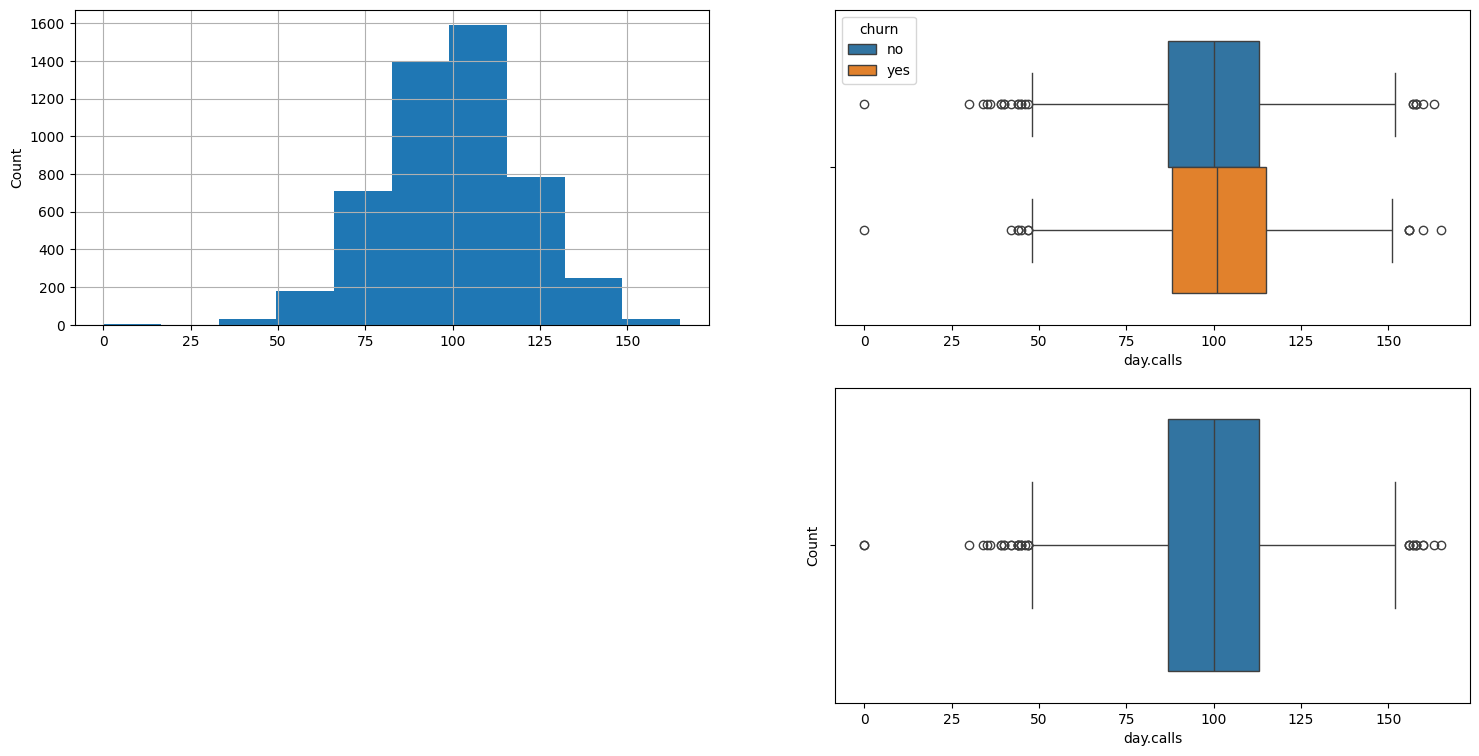

--------------

Feature:  day.charge
Skewness:  -0.01


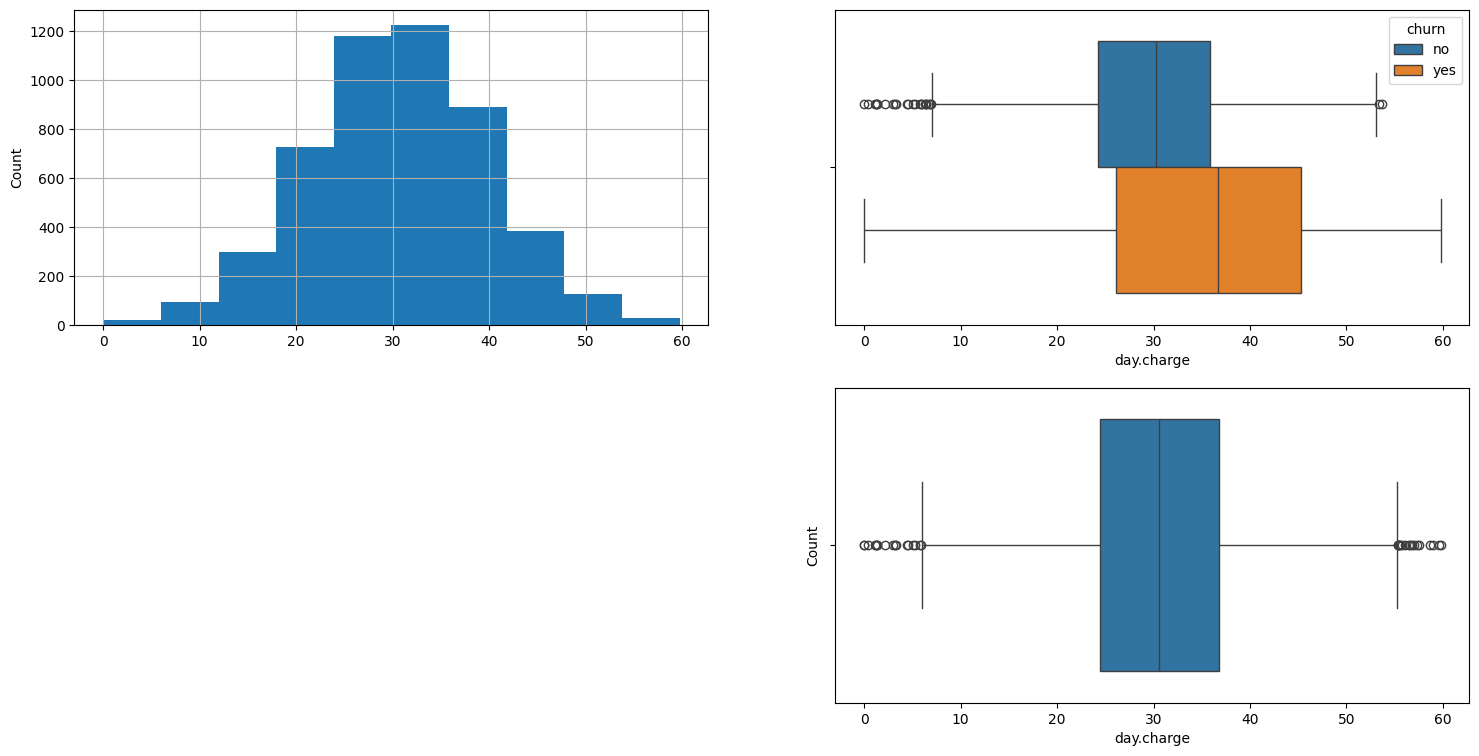

--------------

Feature:  eve.mins
Skewness:  -0.01


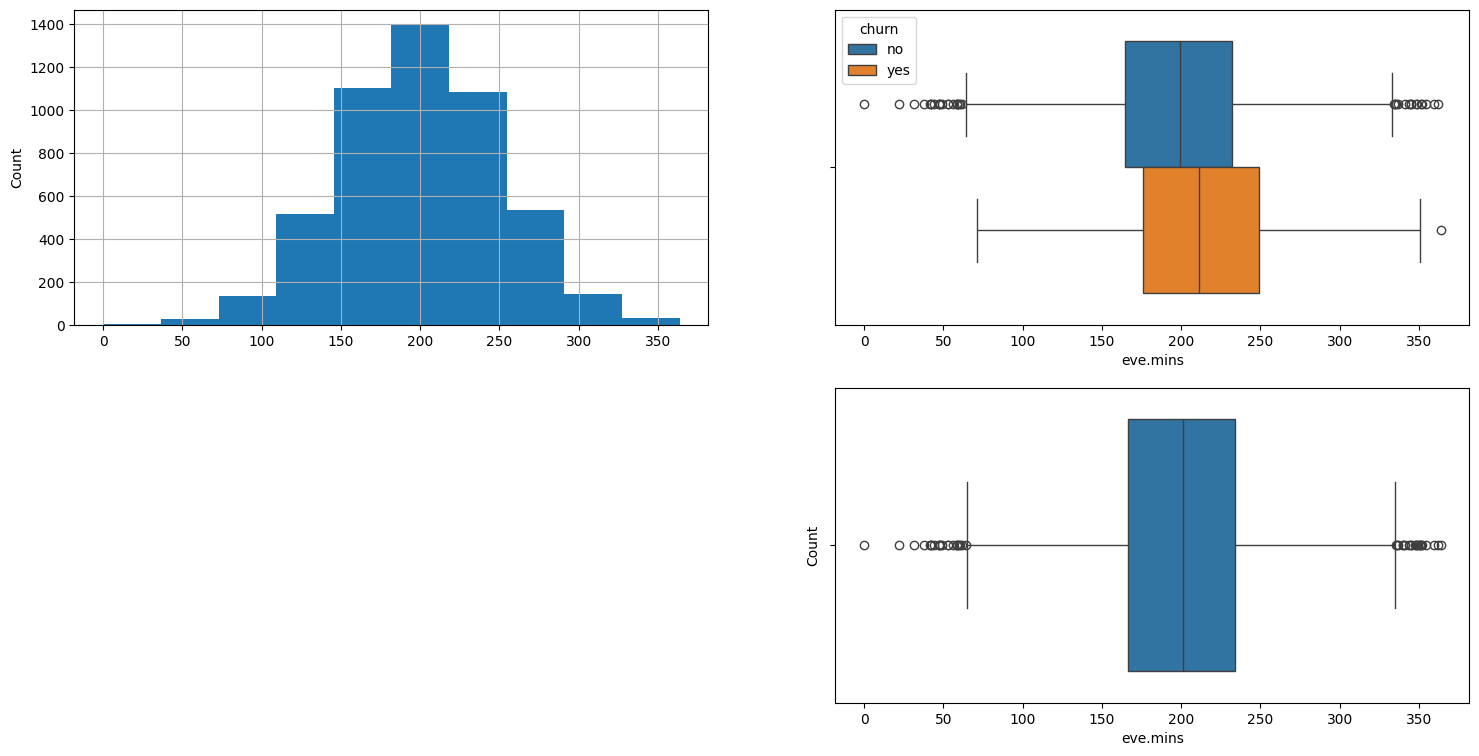

--------------

Feature:  eve.calls
Skewness:  -0.02


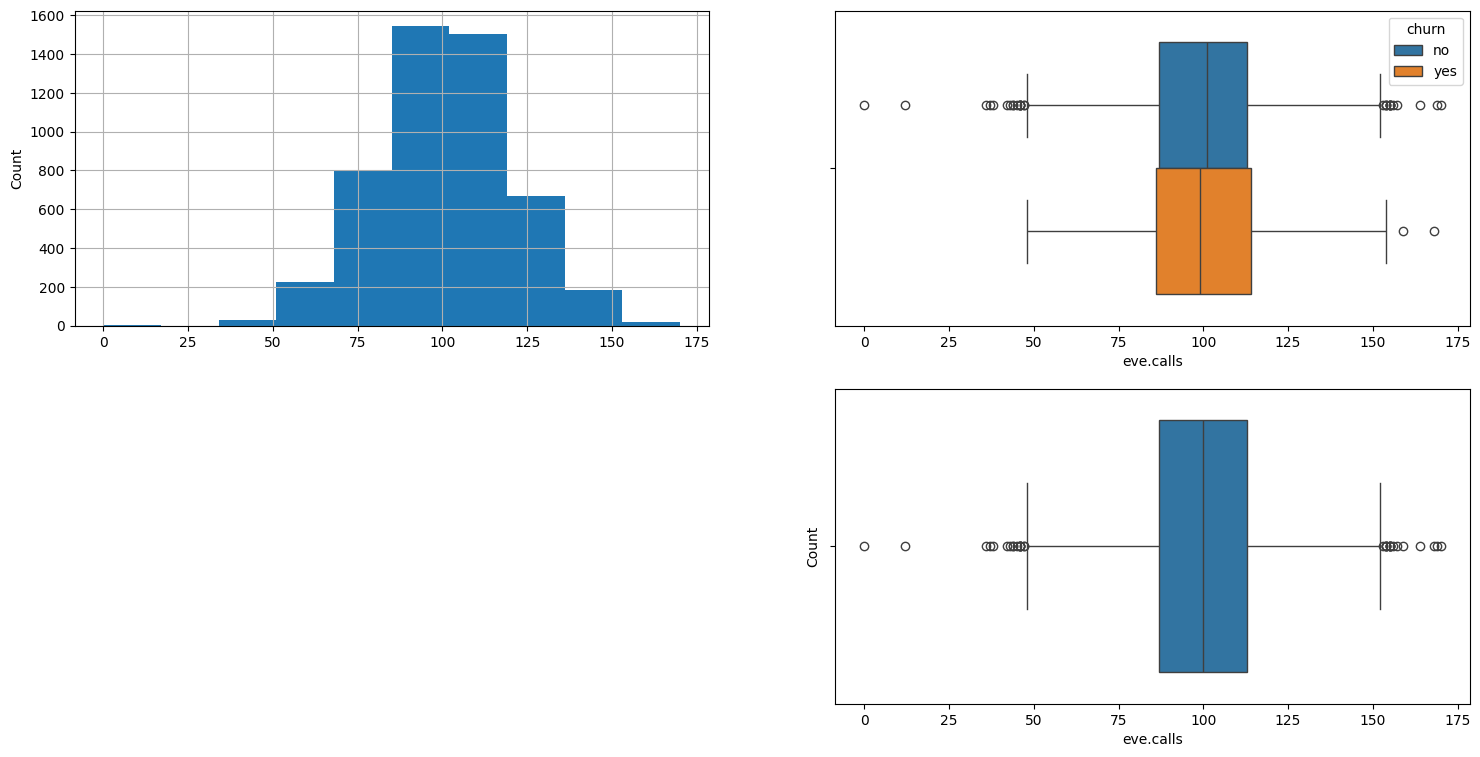

--------------

Feature:  eve.charge
Skewness:  -0.01


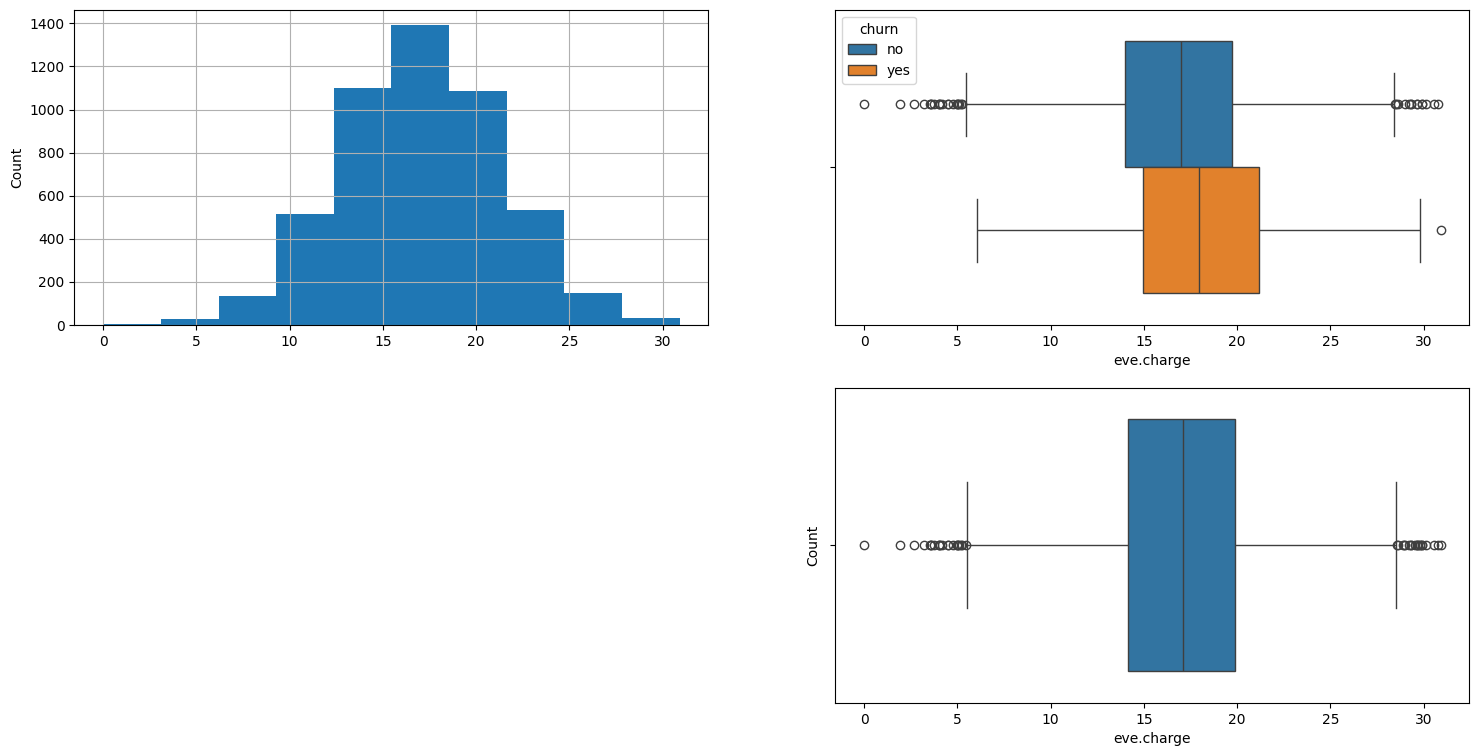

--------------

Feature:  night.mins
Skewness:  0.02


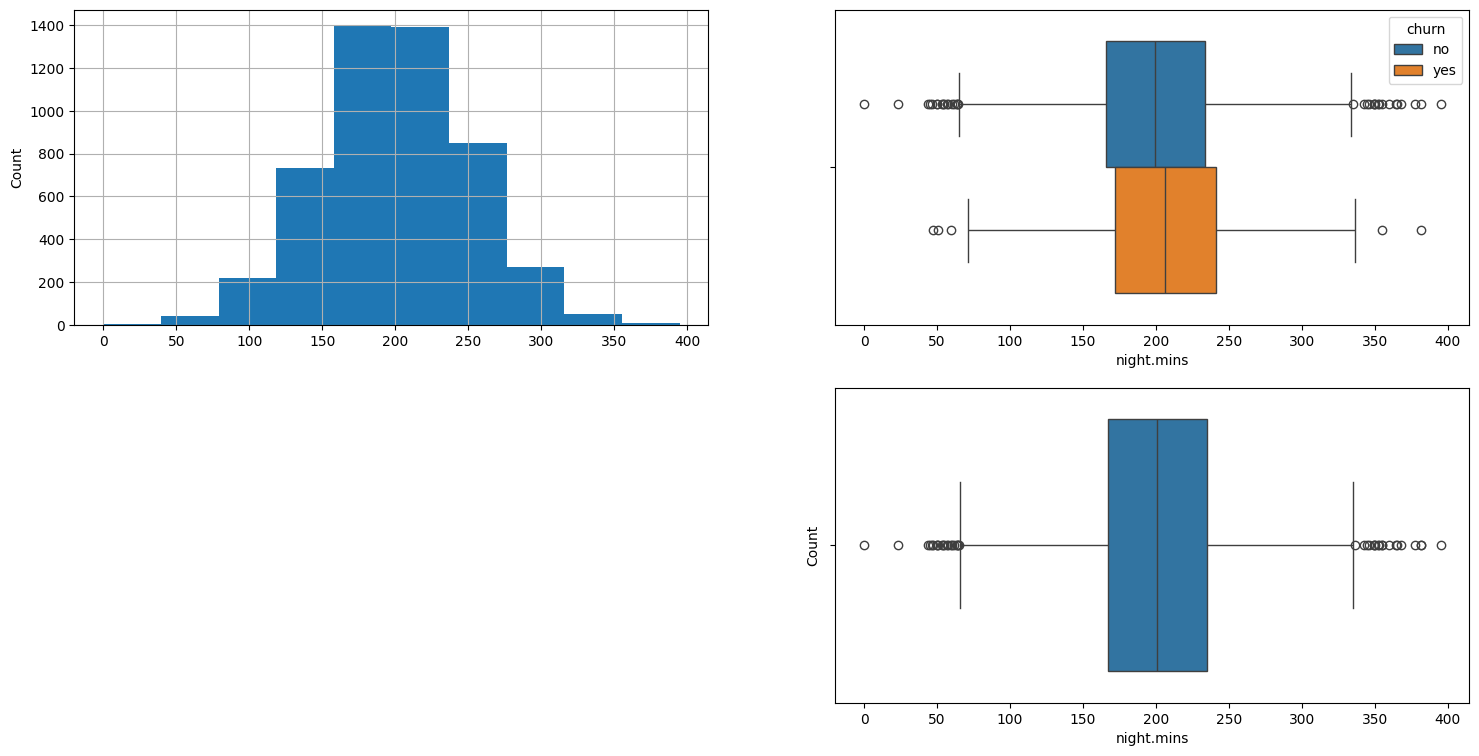

--------------

Feature:  night.calls
Skewness:  0.0


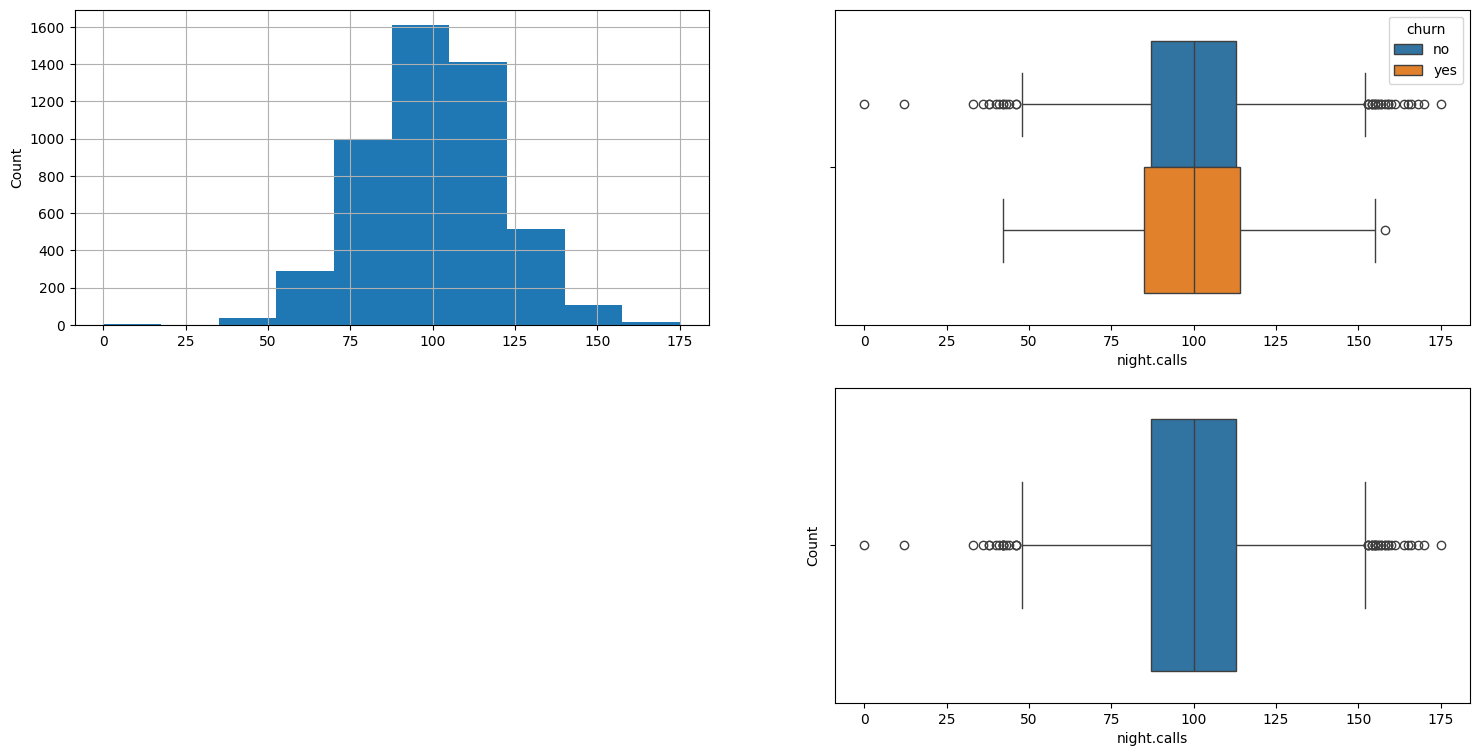

--------------

Feature:  night.charge
Skewness:  0.02


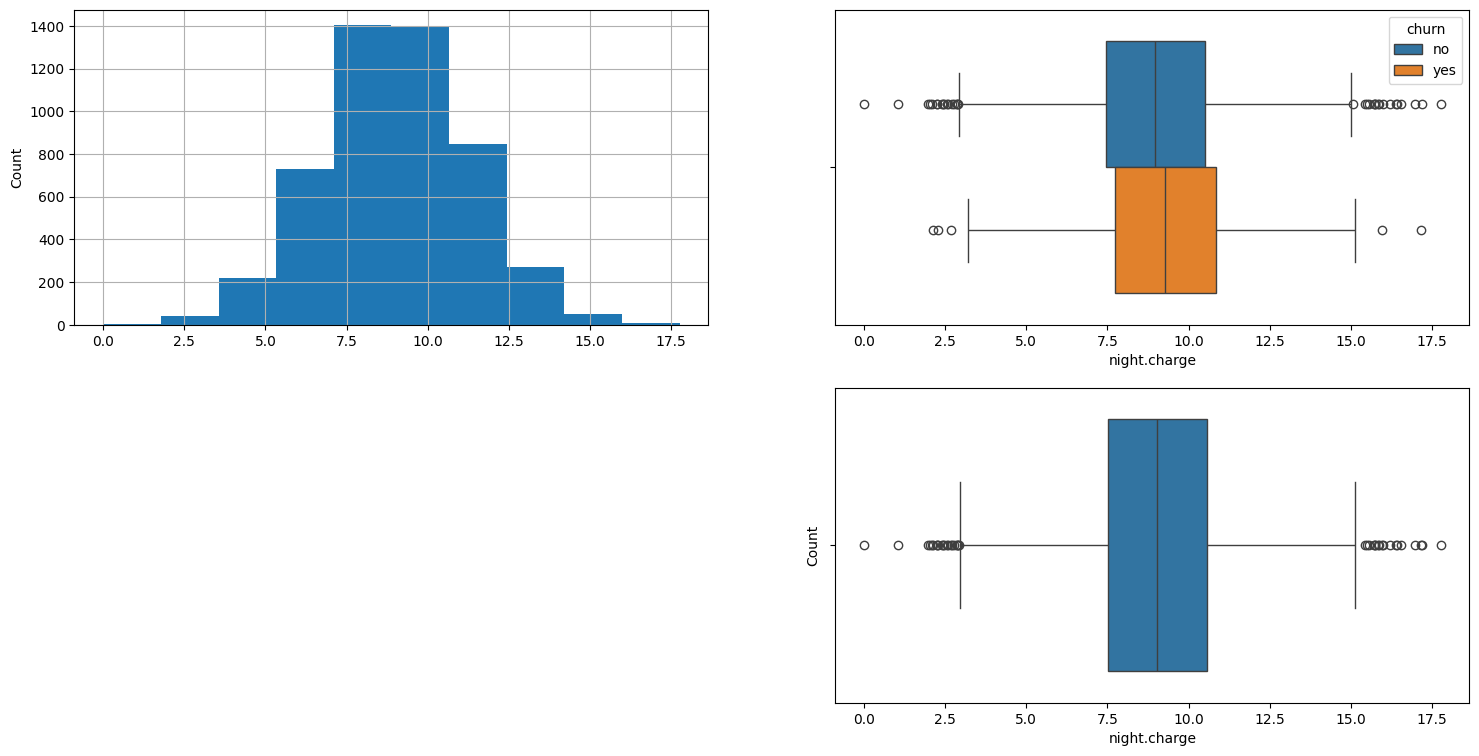

--------------

Feature:  customer.calls
Skewness:  1.04


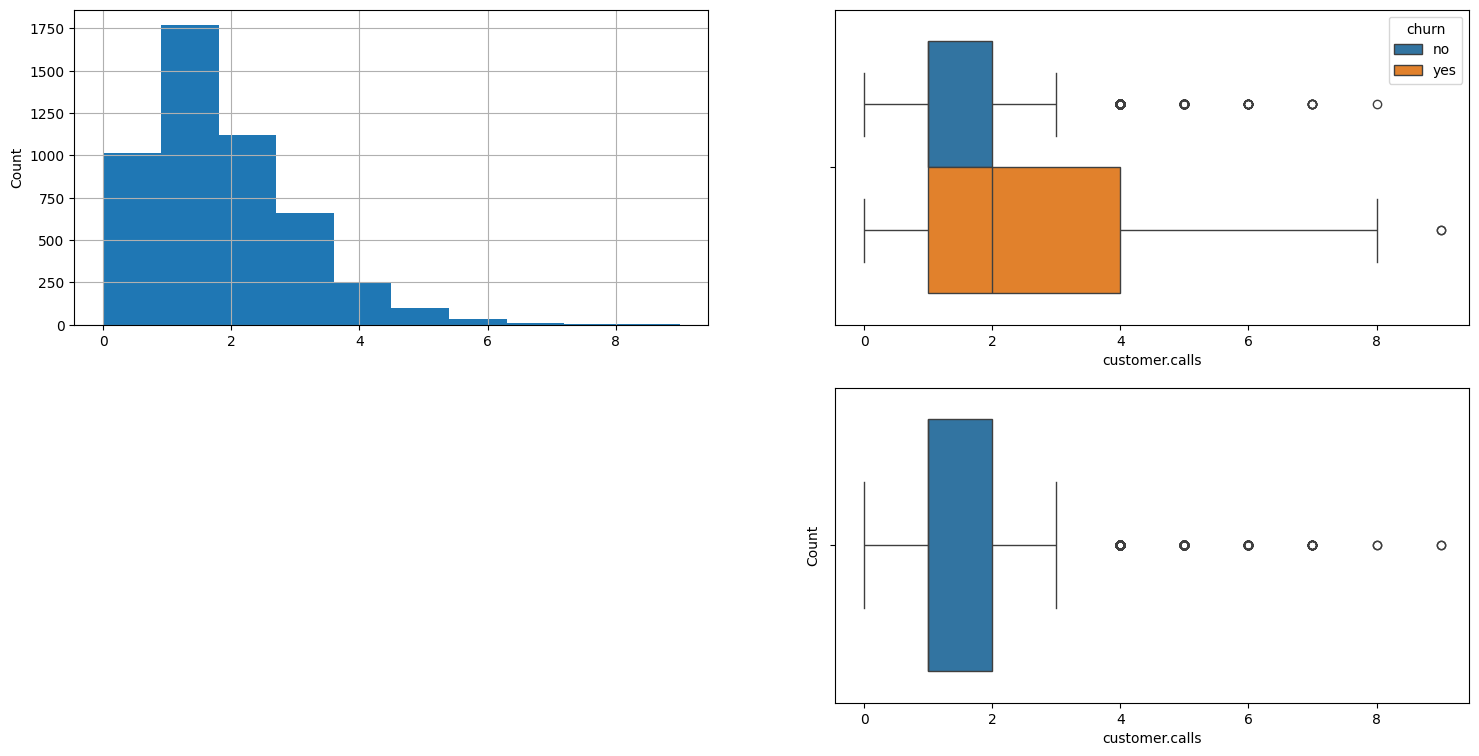

In [227]:
for col in num_cols:
    print("--------------\n")
    print("Feature: ", col)
    print('Skewness: ', round(df[col].skew(), 2))

    plt.figure(figsize=(18, 9))

    plt.subplot(2, 2, 1)
    df[col].hist(grid=True)
    plt.ylabel("Count")

    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x=col, hue='churn')


    #plt.subplot(2, 2, 3)
    #sns.countplot(data=df, x=col, hue='churn')


    plt.subplot(2,2,4)
    sns.boxplot(x=df[col])                           # Frequency Distribution
    plt.ylabel("Count")



    plt.show()

* Relation b/w "voice.plan" and "voice messages"
* At  this point , we cannot remove the outliers (availble data size )

In [228]:
len(df[df['voice.plan']=='no'])      # Even though  Intl.plan is not active people are using Intl service unlike voice.plan

3654

In [229]:
cat_cols,len(cat_cols)

(Index(['state', 'area.code', 'voice.plan', 'intl.plan', 'churn'], dtype='object'),
 5)

#### churn (non-loyal) customers are about 14.2 % , considering the market level of 10 percent .It is high.




####  The output is for Imbalnced data  . We might get high accuarcy  . So dimension reduction is important fot high precision .</font>

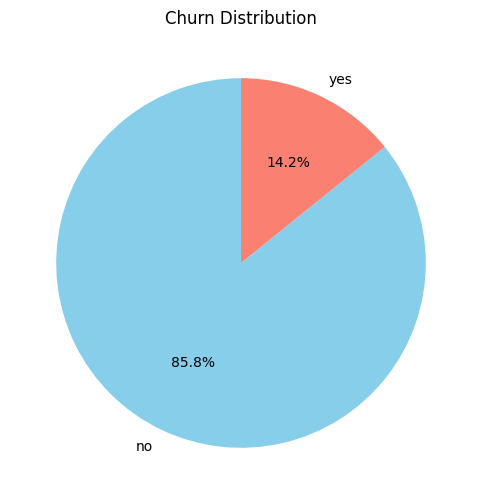

In [230]:
churn_counts = df['churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.show()

* Insights  of data transformations ??? :

In [231]:
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,4969.0,NaN,NaN,NaN,2508.523244,1439.760538,1.0,1265.0,2512.0,3754.0,5000.0
state,4969,51,WV,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area.code,4969,3,area_code_415,2479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account.length,4969.0,NaN,NaN,NaN,100.206681,39.695476,1.0,73.0,100.0,127.0,243.0
voice.plan,4969,2,no,3654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
voice.messages,4969.0,NaN,NaN,NaN,7.75488,13.545738,0.0,0.0,0.0,17.0,52.0
intl.plan,4969,2,no,4499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intl.mins,4969.0,NaN,NaN,NaN,10.264198,2.761996,0.0,8.5,10.3,12.0,20.0
intl.calls,4969.0,NaN,NaN,NaN,4.433085,2.459495,0.0,3.0,4.0,6.0,20.0
intl.charge,4969.0,NaN,NaN,NaN,2.771851,0.745672,0.0,2.3,2.78,3.24,5.4


#### Bi-variate Analysis

#### bar plot for categorical columns vs numerical columns

In [232]:
#bar plots ...Incoming

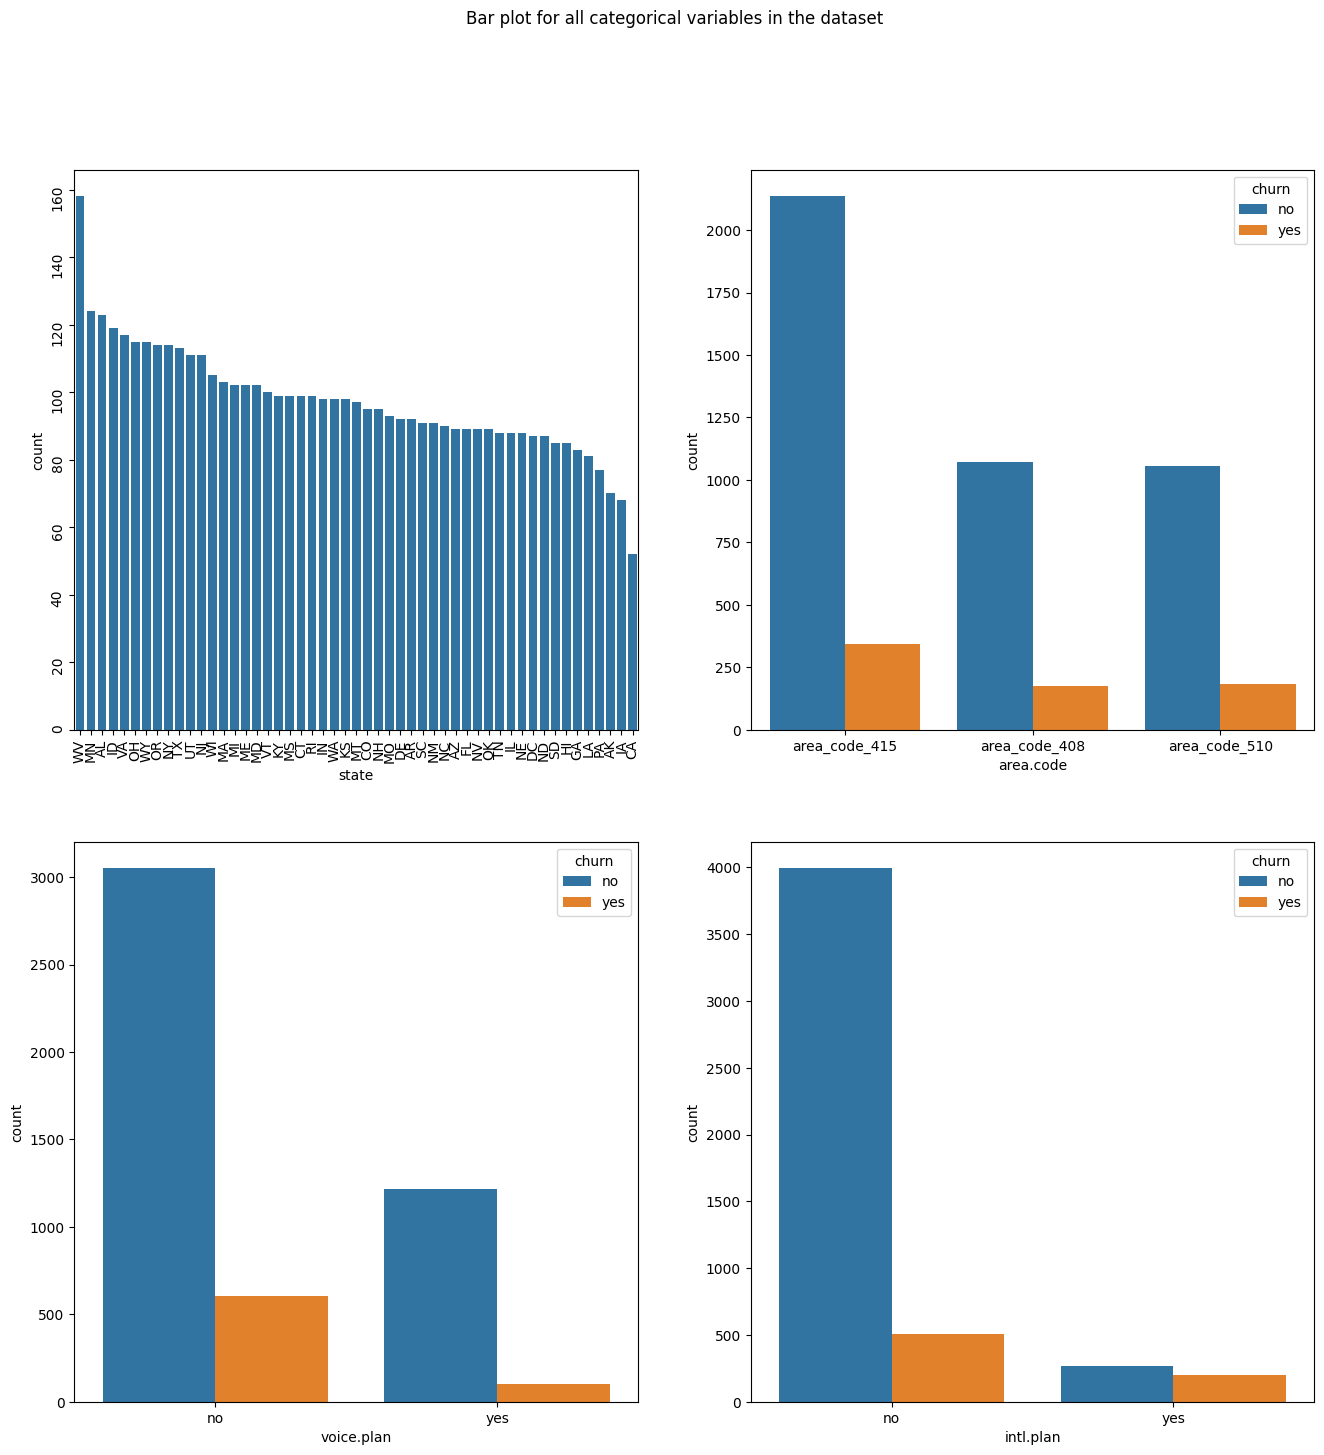

In [233]:
fig, axes = plt.subplots(2, 2, figsize = (16, 16))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'state', data = df,
              order = df['state'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'area.code', data = df,hue = 'churn',
              order = df['area.code'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'voice.plan', data = df,hue = 'churn',
              order = df['voice.plan'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'intl.plan', data =df,hue = 'churn',
              order = df['intl.plan'].value_counts().index);
axes[0][0].tick_params(labelrotation = 90)

 #### We are removing 'voice.plan' , as 'voice.messages' and 'voice.plan' are correlated.
 * Data Redundancy : When the voice.plan is inactive and voice.messages is zero.That creates redundancy as 0 'voice.messages' implies same as inactive 'voice.plan'.

 * Co-relation : The corr() between them is very high 0.95 .It might create a multi-collinearity and affect the model co-efficients.

* Simplicity : We are not losing the predictive power by removing the 'voice.plan' .We are simplifying the model and helping for more robust model.

In [234]:
df[(df['voice.plan']==0) & (df['voice.messages']!=0)]

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn


In [235]:
len(df[(df['voice.plan']==0) & (df['voice.messages']==0)])

0

#### Removing 'voice.plan'  ---

In [236]:
#df=df.drop('voice.plan',axis=1)

#### area.code  vs  state

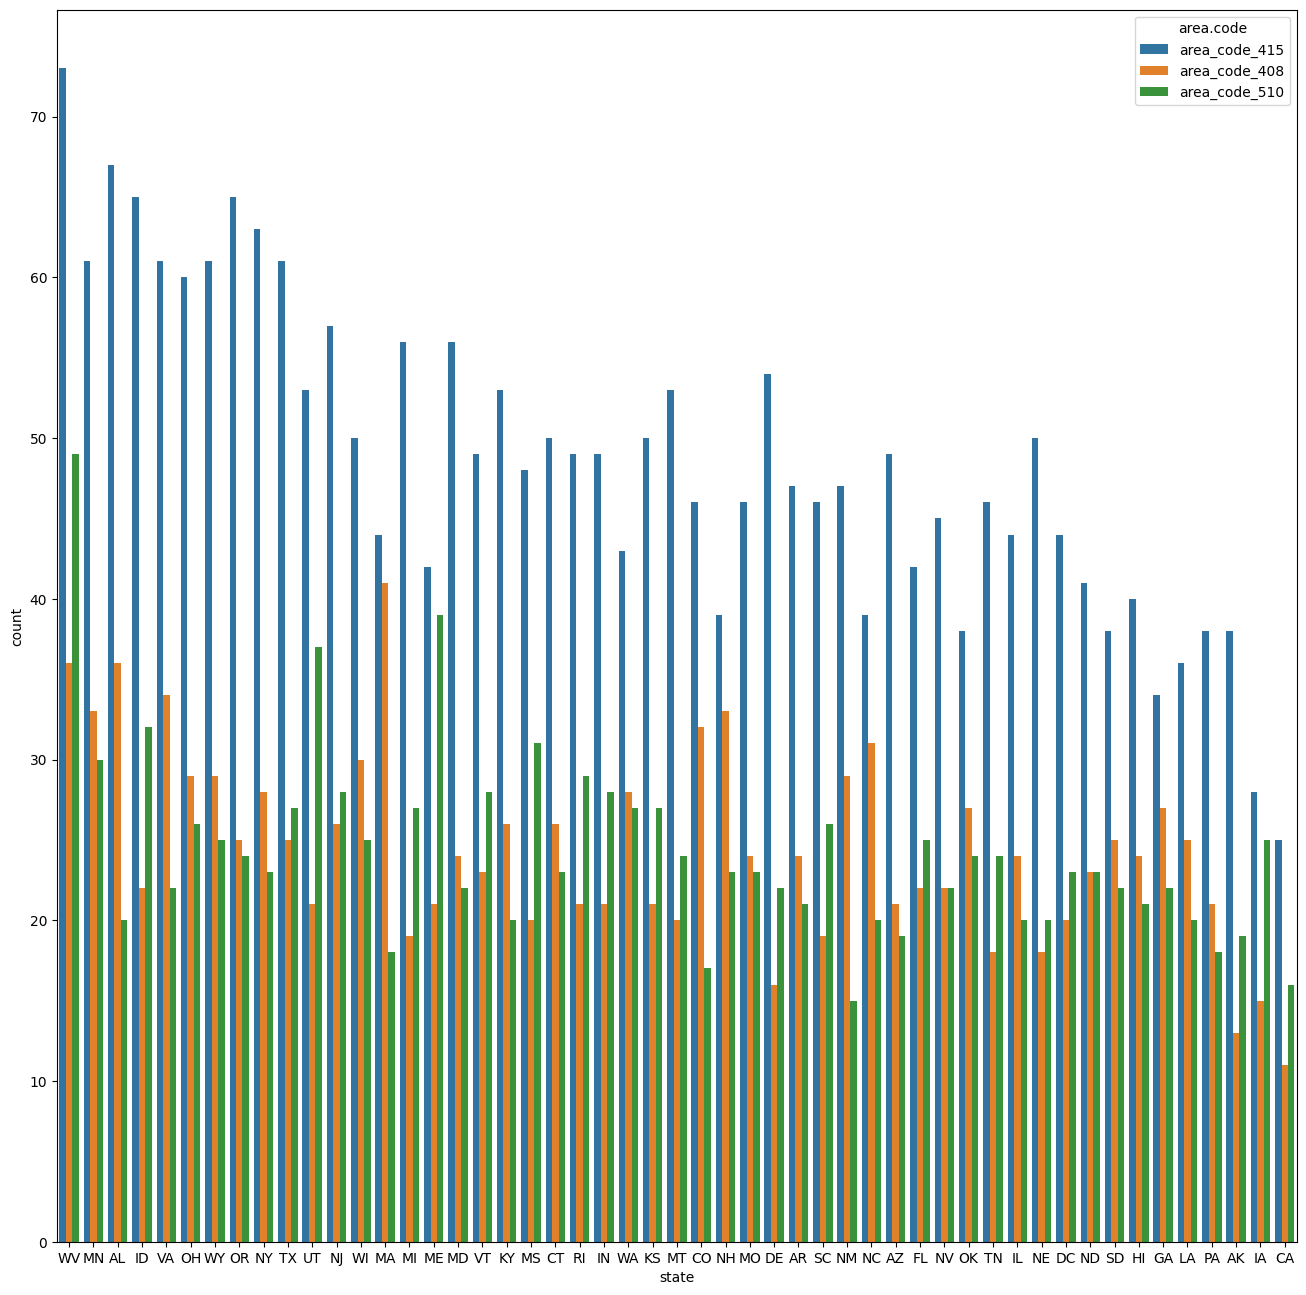

In [237]:
plt.figure(figsize=(16,16))
sns.countplot( x = 'state', data = df,hue = 'area.code',
              order = df['state'].value_counts().index);
plt.show()

#### Attempt to see whether 'State' can be clustered into 'area.code' .It is not possible.
Since it has 51 unique values dispersed into area.code .So, we will have to careful when selecting the categorical encoding .
* NOt using  One-hot encoding label encoding
*  studying catboost encoding for this .

In [238]:
df.nunique()

Unnamed: 0        4969
state               51
area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1957
day.calls          123
day.charge        1957
eve.mins          1875
eve.calls          126
eve.charge        1655
night.mins        1849
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

In [239]:
df[df['state']=='KS']                    #

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
179,180,KS,area_code_408,70,no,0,no,0.0,0,0.00,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,3,no
258,259,KS,area_code_408,92,no,0,yes,10.4,2,2.81,62.6,111,10.64,180.6,126,15.35,221.7,80,9.98,1,yes
287,288,KS,area_code_408,137,no,0,no,14.5,4,3.92,205.9,88,35.00,209.3,86,17.79,289.9,84,13.05,2,no
368,369,KS,area_code_415,132,no,0,no,7.6,5,2.05,83.4,110,14.18,232.2,137,19.74,146.7,114,6.60,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,4545,KS,area_code_408,39,no,0,no,12.1,2,3.27,181.2,71,30.80,344.9,108,29.32,213.6,145,9.61,3,no
4577,4578,KS,area_code_415,158,no,0,yes,8.9,2,2.40,200.0,98,34.00,205.4,106,17.46,323.7,96,14.57,0,yes
4739,4740,KS,area_code_415,132,no,0,no,10.2,4,2.75,164.0,112,27.88,243.6,80,20.71,155.5,122,7.00,1,no
4880,4881,KS,area_code_415,136,no,0,no,10.7,3,2.89,232.9,119,39.59,191.0,103,16.24,222.5,59,10.01,0,no


In [240]:
pd.crosstab(df['churn'], df['intl.plan'], margins=True)

intl.plan,no,yes,All
churn,,,
no,3993,271,4264
yes,506,199,705
All,4499,470,4969


In [241]:
pd.crosstab(df['churn'], df['customer.calls'], margins=True)

customer.calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
no,895,1584,1001,587,140,38,12,6,1,0,4264
yes,121,188,122,73,111,58,22,7,1,2,705
All,1016,1772,1123,660,251,96,34,13,2,2,4969


In [242]:
pd.crosstab(df['customer.calls'],df['churn'],margins = True)

churn,no,yes,All
customer.calls,,,
0,895,121,1016
1,1584,188,1772
2,1001,122,1123
3,587,73,660
4,140,111,251
5,38,58,96
6,12,22,34
7,6,7,13
8,1,1,2


# Multi Variete Analysis

### * day charge - day.mins , eve.charge -eve.mins , night.charge -night.mins , intl.charge -intl.mins , voice.plan - voice.messages    foo <font color='red'> -- Insights -->Feature Engineering....Incoming
</font> foo

# Feature Engineering

In [243]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,4969.0,NaN,NaN,NaN,2508.523244,1439.760538,1.0,1265.0,2512.0,3754.0,5000.0
state,4969,51,WV,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area.code,4969,3,area_code_415,2479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account.length,4969.0,NaN,NaN,NaN,100.206681,39.695476,1.0,73.0,100.0,127.0,243.0
voice.plan,4969,2,no,3654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
voice.messages,4969.0,NaN,NaN,NaN,7.75488,13.545738,0.0,0.0,0.0,17.0,52.0
intl.plan,4969,2,no,4499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intl.mins,4969.0,NaN,NaN,NaN,10.264198,2.761996,0.0,8.5,10.3,12.0,20.0
intl.calls,4969.0,NaN,NaN,NaN,4.433085,2.459495,0.0,3.0,4.0,6.0,20.0
intl.charge,4969.0,NaN,NaN,NaN,2.771851,0.745672,0.0,2.3,2.78,3.24,5.4


#### Standardizing the data
### Trail 1 Simple standard scaler

In [244]:
sr = StandardScaler()

In [245]:
test_scaler =['account.length','voice.messages','day.calls','eve.calls','night.calls','intl.calls']

In [246]:
#df[test_scaler]= sr.transform(df[test_scaler])

In [247]:
df[test_scaler]

,account.length,voice.messages,day.calls,eve.calls,night.calls,intl.calls
0,128,25,110,99,91,3
1,107,26,123,103,103,3
2,137,0,114,110,104,5
3,84,0,71,88,89,7
4,75,0,113,122,121,3
...,...,...,...,...,...,...
4995,50,40,127,126,116,5
4996,152,0,90,73,113,2
4997,61,0,89,128,97,4
4998,109,0,67,92,89,6


#### DATA REDUCTION : The "Unnamed: 0" had been removed as it is irrelevant Beacuse *** It does not have the predictive power and for predicting the churn ***

In [248]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)

#### We are merging day.charge and day.mins into one column as  "day.chargePERmin" similarly for intl.chargepermin ,eve.chargepermin , ngt.chargepermin  .

Charge per min  denotes  day.charge/day.min  because of their absolute dependency .from correlation table .

###look for NaN values , NUll values

In [249]:
#df['day.chargepermin'] = np.where((df['day.mins'] != 0) & (df['day.charge'] != 0), df['day.charge'] / df['day.mins'], 0.0)

In [250]:
#df[df['day.chargepermin'].isna()]

In [251]:
#df['eve.chargepermin'] = np.where((df['eve.mins'] != 0) & (df['eve.charge'] != 0), df['eve.charge'] / df['eve.mins'], 0.0)

In [252]:
#df[df['eve.chargepermin'].isna()]

In [253]:
#df['night.chargepermin'] = np.where((df['night.mins'] != 0) & (df['night.charge'] != 0), df['night.charge'] / df['night.mins'], 0.0)

In [254]:
#df[df['night.chargepermin'].isna()]

In [255]:
#df['intl.chargepermin'] = np.where((df['intl.mins'] != 0) & (df['intl.charge'] != 0), df['intl.charge'] / df['intl.mins'], 0.0)

In [256]:
#df[df['intl.chargepermin'].isna()]

In [257]:
# Assuming 'df' is your DataFrame
columns_to_drop = ["eve.mins",   "day.mins",  "night.mins",  "intl.mins"]

# Drop the specified columns
df_filtered = df.drop(columns_to_drop, axis=1)





In [258]:
# Generate descriptive statistics for the remaining columns
df_filtered.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,4969,51,WV,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area.code,4969,3,area_code_415,2479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account.length,4969.0,NaN,NaN,NaN,100.206681,39.695476,1.0,73.0,100.0,127.0,243.0
voice.plan,4969,2,no,3654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
voice.messages,4969.0,NaN,NaN,NaN,7.75488,13.545738,0.0,0.0,0.0,17.0,52.0
intl.plan,4969,2,no,4499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intl.calls,4969.0,NaN,NaN,NaN,4.433085,2.459495,0.0,3.0,4.0,6.0,20.0
intl.charge,4969.0,NaN,NaN,NaN,2.771851,0.745672,0.0,2.3,2.78,3.24,5.4
day.calls,4969.0,NaN,NaN,NaN,100.021936,19.835965,0.0,87.0,100.0,113.0,165.0
day.charge,4969.0,NaN,NaN,NaN,30.652604,9.168275,0.0,24.43,30.62,36.75,59.76


#### Using One-Hot Endcoding for area.code ,it will binary vectors for unique vectors because these are not ordinal.

In [259]:
from sklearn.preprocessing import TargetEncoder
target_enc = TargetEncoder()
target_enc.fit(df_filtered[['state']],df_filtered[['churn']])

TargetEncoder()

In [260]:
from sklearn.preprocessing import LabelBinarizer
columns_to_binarize = ['intl.plan','churn','voice.plan']
lb  = LabelBinarizer()

In [261]:
for i in columns_to_binarize:
  df_filtered[i]=lb.fit_transform(df_filtered[i])

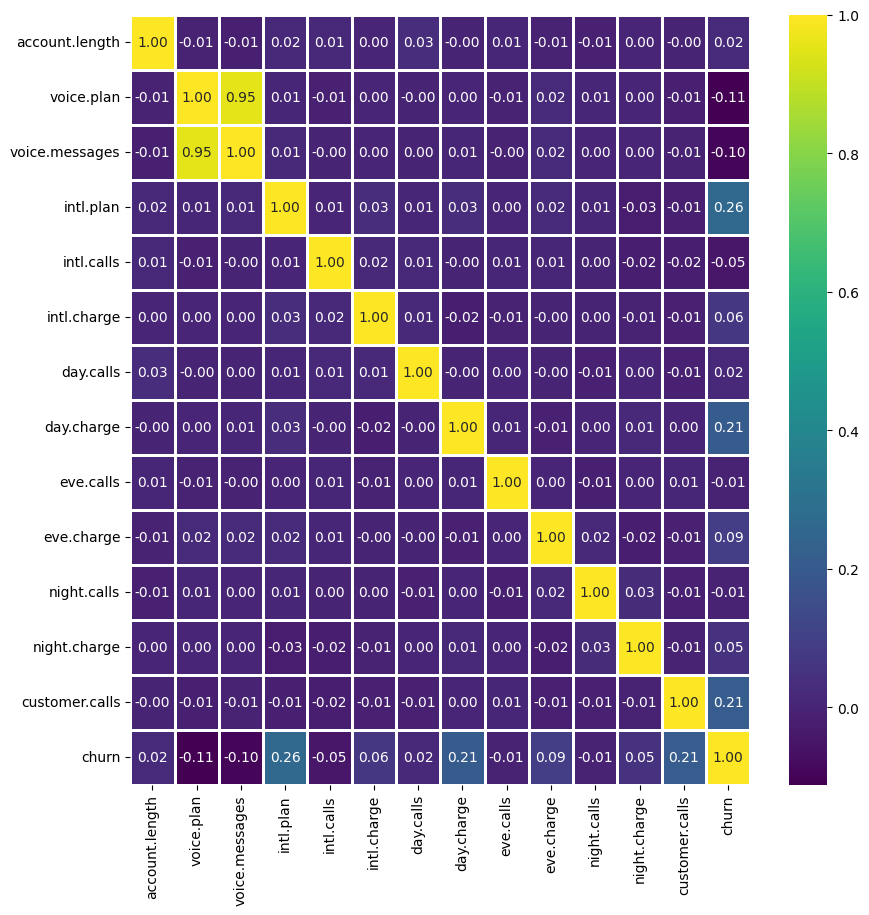

In [266]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_filtered.drop(['state','area.code'],axis =1).corr(), annot = True, fmt='.2f', cmap='viridis', linewidths=2 )
plt.show()

In [263]:
sns.heatmap(df_filtered[['intl.plan','intl.mins','intl.calls','intl.charge']].corr(),annot=True,cmap ='Blues')


KeyError: "['intl.mins'] not in index"

In [267]:
df_filtered[['voice.plan','voice.messages']].corr()

,voice.plan,voice.messages
voice.plan,1.000000,0.954416
voice.messages,0.954416,1.000000


In [268]:
df_filtered.drop('voice.plan',axis =1 ,inplace = True)

In [269]:
df_filtered[['state']]=target_enc.transform(df_filtered[['state']])

In [270]:
from sklearn.preprocessing import OneHotEncoder

In [271]:
#df_featured = pd.get_dummies(df_filtered, columns=['area.code'],dtype = int)

In [272]:
one_hot_enc = OneHotEncoder(drop='first',sparse_output = False)

In [273]:
one_hot_enc.fit(df_filtered[['area.code']])

OneHotEncoder(drop='first', sparse_output=False)

In [274]:
df_filtered[['area.code.1','area.code.2']] = one_hot_enc.transform(df[['area.code']])


In [275]:
df_filtered.drop('area.code',axis=1,inplace=True)

In [276]:
df_filtered.columns

Index(['state', 'account.length', 'voice.messages', 'intl.plan', 'intl.calls',
       'intl.charge', 'day.calls', 'day.charge', 'eve.calls', 'eve.charge',
       'night.calls', 'night.charge', 'customer.calls', 'churn', 'area.code.1',
       'area.code.2'],
      dtype='object')

In [277]:

cols = ['account.length','voice.messages',  'intl.calls',
       'intl.charge', 'day.calls', 'day.charge', 'eve.calls', 'eve.charge',
       'night.calls', 'night.charge', 'customer.calls']
cols

['account.length',
 'voice.messages',
 'intl.calls',
 'intl.charge',
 'day.calls',
 'day.charge',
 'eve.calls',
 'eve.charge',
 'night.calls',
 'night.charge',
 'customer.calls']

In [279]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [280]:
df_filtered[cols] = SS.fit_transform(df_filtered.drop(['area.code.1','area.code.2','churn','intl.plan','state'],axis =1 ))

In [281]:
df_filtered

,state,account.length,voice.messages,intl.plan,intl.calls,intl.charge,day.calls,day.charge,eve.calls,eve.charge,night.calls,night.charge,customer.calls,churn,area.code.1,area.code.2
0,0.183155,0.700234,1.273231,0,-0.582733,-0.096368,0.503080,1.572689,-0.059243,-0.063471,-0.448690,0.875429,-0.437493,0,1.0,0.0
1,0.130527,0.171153,1.347063,0,-0.582733,1.244840,1.158521,-0.347167,0.142455,-0.100712,0.152602,1.068960,-0.437493,0,1.0,0.0
2,0.241881,0.926983,-0.572554,0,0.230524,0.694945,0.704754,1.170174,0.495428,-1.571728,0.202710,-0.747585,-1.202413,0,1.0,0.0
3,0.130527,-0.408316,-0.572554,1,1.043781,-1.330279,-1.463244,2.208642,-0.613914,-2.744816,-0.548906,-0.070229,0.327427,0,0.0,0.0
4,0.179267,-0.635065,-0.572554,1,-0.582733,-0.056132,0.654335,-0.252265,1.100524,-1.034062,1.054541,-0.268158,1.092347,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.059265,-1.264923,2.380702,0,0.230524,-0.136604,1.360195,1.027275,1.302222,0.443936,0.804002,1.922252,0.327427,0,0.0,0.0
4996,0.139257,1.304898,-0.572554,0,-0.989362,1.606966,-0.505292,0.071711,-1.370284,1.111945,0.653679,0.259652,1.092347,1,1.0,0.0
4997,0.103782,-0.987786,-0.572554,0,-0.176105,1.204604,-0.555710,-0.736593,1.403071,-0.549930,-0.148044,0.237659,-0.437493,0,1.0,0.0
4998,0.103782,0.221542,-0.572554,0,0.637152,-0.632851,-1.664918,0.157886,-0.412216,-0.573206,-0.548906,0.475174,-1.202413,0,0.0,1.0


#### Target Encoding vs Cat boost encoding

In [282]:
# Split the data into training and test sets
train_df, test_df = train_test_split(df_filtered, test_size=0.2, random_state=42)

* removing the state feature after encoding with target encoding

In [ ]:
#train_df=train_df.drop('state',axis=1)

In [ ]:
#test_df=test_df.drop('state',axis=1)

In [283]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3975 entries, 1501 to 878
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           3975 non-null   float64
 1   account.length  3975 non-null   float64
 2   voice.messages  3975 non-null   float64
 3   intl.plan       3975 non-null   int64  
 4   intl.calls      3975 non-null   float64
 5   intl.charge     3975 non-null   float64
 6   day.calls       3975 non-null   float64
 7   day.charge      3975 non-null   float64
 8   eve.calls       3975 non-null   float64
 9   eve.charge      3975 non-null   float64
 10  night.calls     3975 non-null   float64
 11  night.charge    3975 non-null   float64
 12  customer.calls  3975 non-null   float64
 13  churn           3975 non-null   int64  
 14  area.code.1     3975 non-null   float64
 15  area.code.2     3975 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 527.9 KB


In [284]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 874 to 2199
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           994 non-null    float64
 1   account.length  994 non-null    float64
 2   voice.messages  994 non-null    float64
 3   intl.plan       994 non-null    int64  
 4   intl.calls      994 non-null    float64
 5   intl.charge     994 non-null    float64
 6   day.calls       994 non-null    float64
 7   day.charge      994 non-null    float64
 8   eve.calls       994 non-null    float64
 9   eve.charge      994 non-null    float64
 10  night.calls     994 non-null    float64
 11  night.charge    994 non-null    float64
 12  customer.calls  994 non-null    float64
 13  churn           994 non-null    int64  
 14  area.code.1     994 non-null    float64
 15  area.code.2     994 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 132.0 KB


#Getting Ready

* Lets start with Logistic regression

In [285]:
x_train = train_df.drop('churn',axis =1)
y_train = train_df['churn']

In [286]:
x_test =test_df.drop('churn',axis =1)
y_test = test_df['churn']

In [287]:
x_train.describe(include ='all').T

,count,mean,std,min,25%,50%,75%,max
state,3975.0,0.141956,0.048491,0.051590,0.105918,0.141185,0.175092,0.265392
account.length,3975.0,-0.006101,0.998300,-2.499445,-0.685454,-0.005207,0.675040,3.597581
voice.messages,3975.0,0.000954,0.999564,-0.572554,-0.572554,-0.572554,0.682580,3.266679
intl.plan,3975.0,0.091824,0.288814,0.000000,0.000000,0.000000,0.000000,1.000000
intl.calls,3975.0,-0.016011,0.994754,-1.802619,-0.582733,-0.176105,0.637152,5.923323
intl.charge,3975.0,-0.008924,1.001031,-3.717629,-0.632851,0.010929,0.627884,3.417597
day.calls,3975.0,0.003473,0.994323,-5.042961,-0.656547,-0.001106,0.654335,3.276100
day.charge,3975.0,0.003816,0.994752,-3.343670,-0.677688,0.016078,0.677120,3.175115
eve.calls,3975.0,0.012011,1.007394,-4.446186,-0.664339,0.041606,0.697126,3.520906
eve.charge,3975.0,0.010459,1.003587,-3.526875,-0.659326,0.008683,0.679019,3.225366


look for null values or NaN values

In [288]:
x_test.isna().sum()

state             0
account.length    0
voice.messages    0
intl.plan         0
intl.calls        0
intl.charge       0
day.calls         0
day.charge        0
eve.calls         0
eve.charge        0
night.calls       0
night.charge      0
customer.calls    0
area.code.1       0
area.code.2       0
dtype: int64

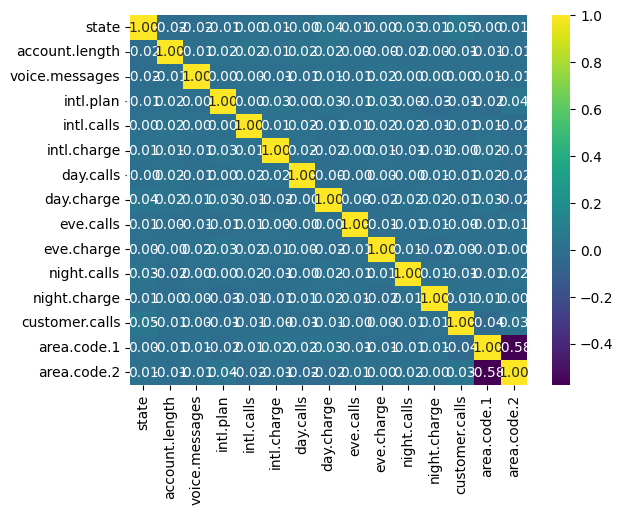

In [289]:
sns.heatmap(x_train.corr(),annot = True,fmt='0.2f',cmap ='viridis')
plt.show()

In [290]:
# Get the feature names used during training
feature_names = x_train.columns

# Reorder the DataFrame columns to match the order used during training
feature_names



Index(['state', 'account.length', 'voice.messages', 'intl.plan', 'intl.calls',
       'intl.charge', 'day.calls', 'day.charge', 'eve.calls', 'eve.charge',
       'night.calls', 'night.charge', 'customer.calls', 'area.code.1',
       'area.code.2'],
      dtype='object')

In [291]:
x_train.isna().sum()

state             0
account.length    0
voice.messages    0
intl.plan         0
intl.calls        0
intl.charge       0
day.calls         0
day.charge        0
eve.calls         0
eve.charge        0
night.calls       0
night.charge      0
customer.calls    0
area.code.1       0
area.code.2       0
dtype: int64

#### Start Handling the Imbalanced data with Over sampling .

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

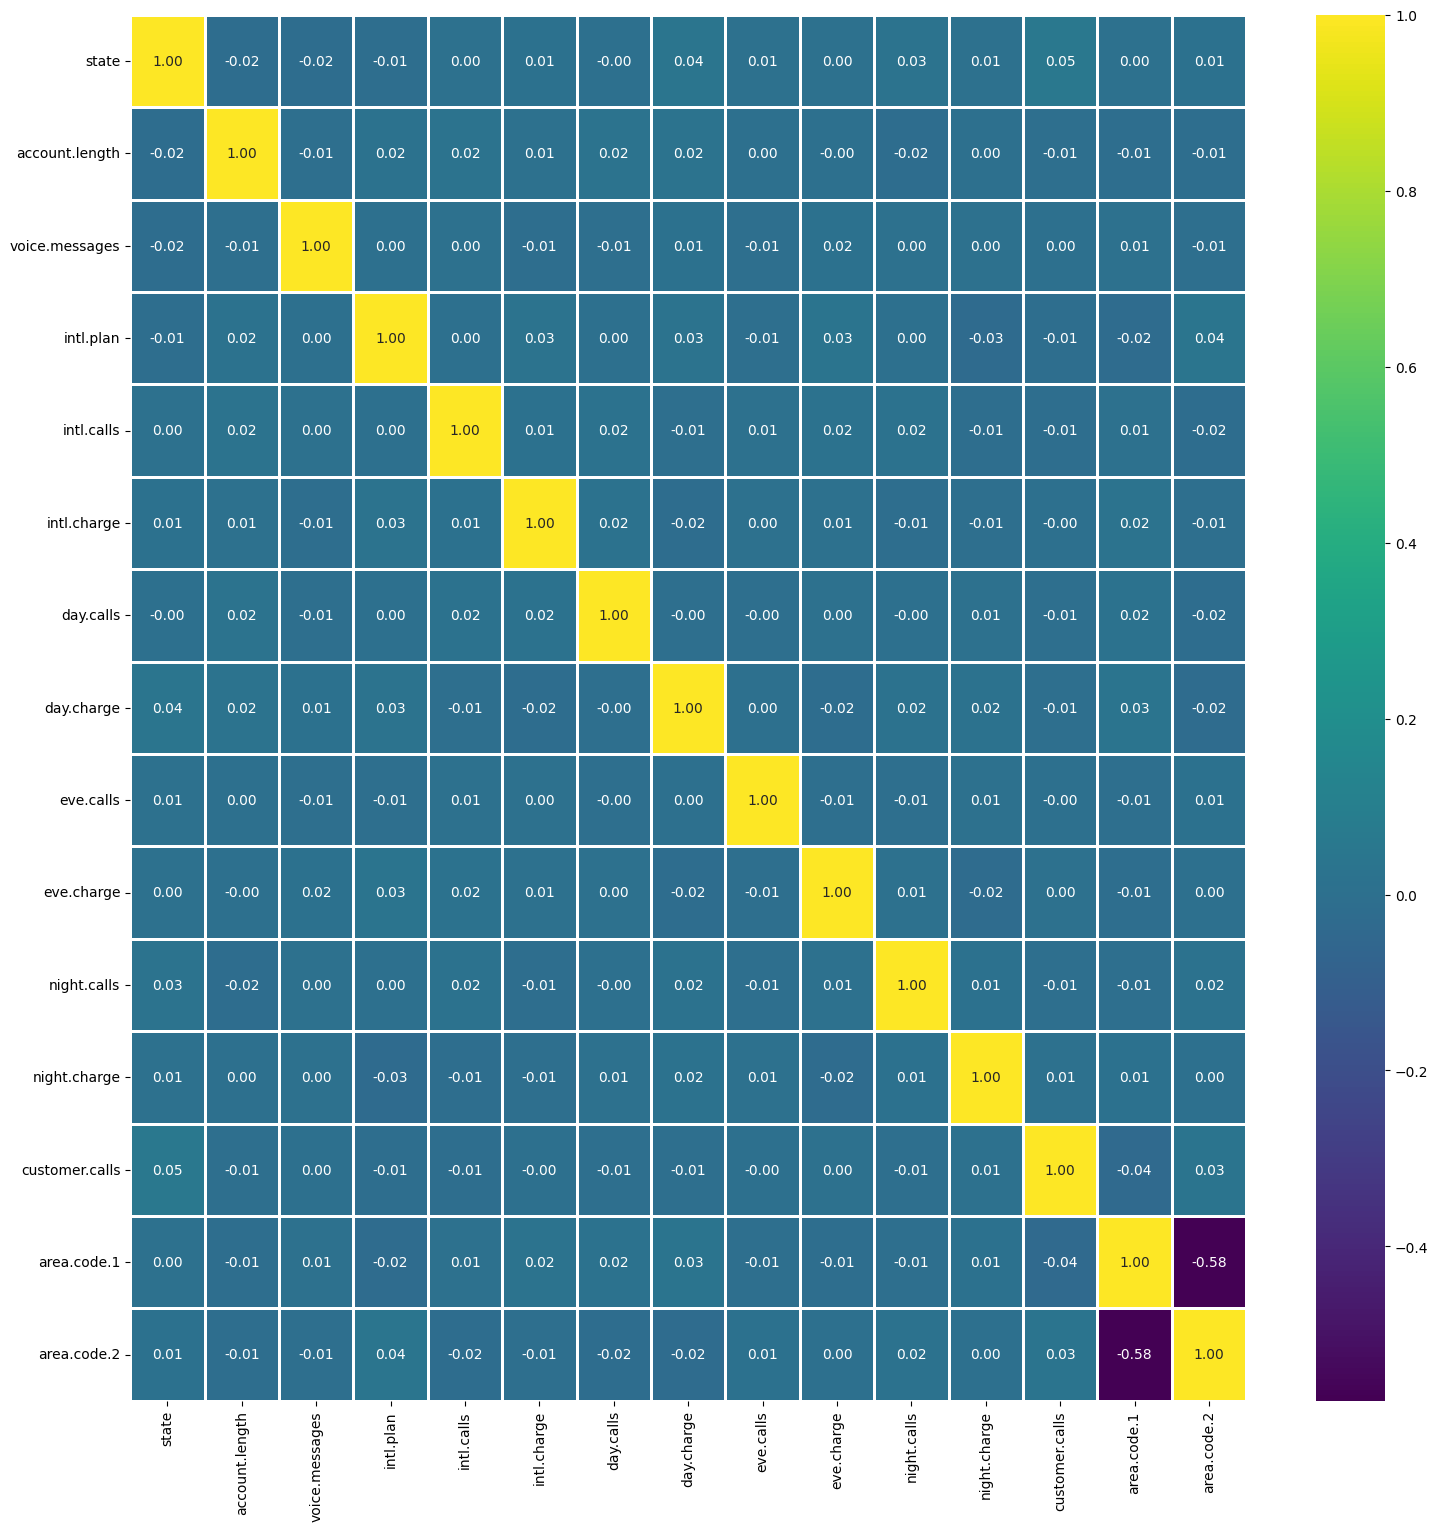

In [292]:
plt.figure(figsize=(18, 18))
sns.heatmap(x_train.corr(), annot = True, fmt='.2f', cmap='viridis', linewidths=2 )
plt.show()

# Logistic regression

In [294]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid_lr = {'penalty': ['l1', 'l2'],  # regularization penalty
                 'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # regularization strength

# Create the Logistic Regression classifier
lr = LogisticRegression()

# Create GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')

# Fit the model using GridSearch for Logistic Regression
grid_search_lr.fit(x_train, y_train)

# Get the best parameters and best score for Logistic Regression
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best Parameters for Logistic Regression:", best_params_lr)
print("Best Score for Logistic Regression:", best_score_lr)

# Use the best parameters to create and train the final Logistic Regression classifier
best_lr = LogisticRegression(penalty=best_params_lr['penalty'], C=best_params_lr['C'])
best_lr.fit(x_train, y_train)

# Calculate the test accuracy for the best Logistic Regression classifier
test_accuracy_lr = best_lr.score(x_test, y_test) * 100
print("Test Accuracy for Logistic Regression:", test_accuracy_lr)


Best Parameters for Logistic Regression: {'C': 100, 'penalty': 'l2'}
Best Score for Logistic Regression: 0.8722012578616353
Test Accuracy for Logistic Regression: 85.01006036217304


In [295]:
y_pred_lr = best_lr.predict(x_test)

Confusion Matrix:
[[811  22]
 [127  34]]


<Axes: >

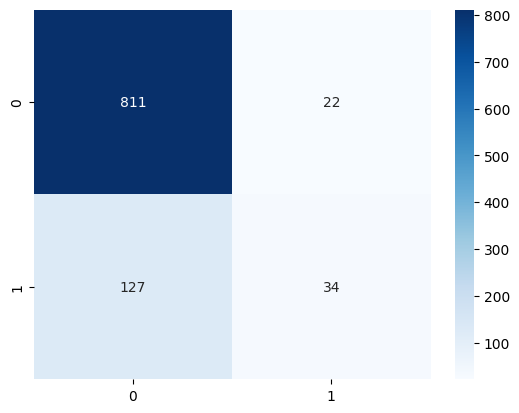

In [296]:
# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix,annot =True,cmap ='Blues' ,fmt = "d")

In [297]:
report = classification_report(y_test, y_pred_lr)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.86      0.97      0.92       833
           1       0.61      0.21      0.31       161

    accuracy                           0.85       994
   macro avg       0.74      0.59      0.61       994
weighted avg       0.82      0.85      0.82       994



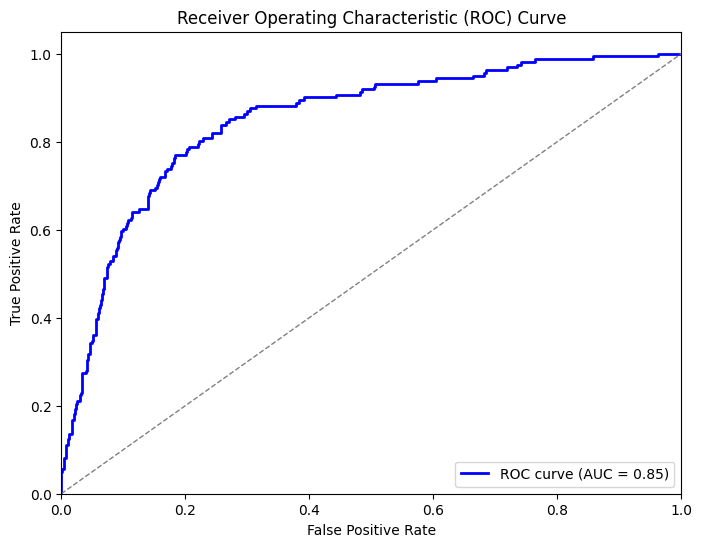

In [298]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_probs_lr = best_lr.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_lr)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



### Confusion matrix
Table that describes the performance of a classification model

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [300]:
from sklearn.metrics import roc_auc_score,auc

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_probs_lr)

# Print the AUC score or use it as needed
print("AUC Score:", auc_score)


AUC Score: 0.8493583768911293


In [301]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



When dealing with imbalanced data, where one class is significantly more prevalent than the other, choosing the right machine learning algorithm and employing appropriate techniques is crucial to achieve meaningful results. Here are some suggestions for handling imbalanced binary classification data:

* Choose an Algorithm that Handles Imbalanced Data Well: Some machine learning
algorithms are inherently more robust to imbalanced data. Algorithms like Random Forests, Gradient Boosting Machines (GBM), and Support Vector Machines (SVM) can perform well with imbalanced datasets.
* Use Resampling Techniques: Resampling techniques involve either oversampling the minority class, undersampling the majority class, or a combination of both to balance the class distribution. Techniques like Synthetic Minority Over-sampling Technique (SMOTE), Adaptive Synthetic Sampling (ADASYN), and Random Under-sampling can help address class imbalance.
* Consider Algorithm-Specific Techniques: Some algorithms have built-in methods to handle imbalanced data. For example, in Random Forests, you can adjust class weights to penalize misclassification of the minority class more heavily. Similarly, in SVM, you can use class weights or adjust the decision threshold to account for class imbalance.
* Use Evaluation Metrics Carefully: Accuracy is not always the best metric to evaluate model performance on imbalanced data because it can be misleading. Instead, consider using metrics like precision, recall, F1 score, area under the ROC curve (AUC-ROC), or area under the precision-recall curve (AUC-PR) that provide a more balanced view of model performance.
* Implement Ensemble Methods: Ensemble methods, such as Bagging, Boosting, and Stacking, can help improve model performance on imbalanced data by combining multiple weak learners to create a stronger overall model.
* Utilize Cross-Validation: When evaluating models, ensure that you use techniques like stratified cross-validation to maintain the class distribution in each fold. This helps in obtaining more reliable estimates of model performance.
* Feature Engineering: Carefully select and engineer features that capture relevant information about both classes. This can help improve the discriminative power of the model and reduce the impact of class imbalance.
* By applying these strategies and experimenting with different algorithms and techniques, you can develop effective models for binary classification tasks with imbalanced data. It's essential to carefully assess the performance of your models and iterate on your approach to achieve the best results.

1. Accuracy: The accuracy of the model is approximately 90.44%, indicating that it correctly predicts the class label for 90.44% of the samples in the test dataset.
2. Precision:
  * Precision for class 0 (non-churn): 91% of the samples predicted as non-churn are actually non-churn.
  * Precision for class 1 (churn): 81% of the samples predicted as churn are actually churn.
3. Recall:
  * Recall for class 0 (non-churn): 99% of the actual non-churn samples are correctly predicted as non-churn.
  * Recall for class 1 (churn): 37% of the actual churn samples are correctly predicted as churn.
4. F1-score:
  * F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
  * F1-score for class 0 (non-churn) is 0.95, and for class 1 (churn) is 0.50.
5. Support:
  * Support represents the number of samples for each class in the test dataset.
There are 1035 samples for class 0 (non-churn) and 158 samples for class 1 (churn).
6. Macro Average:
Macro average of precision, recall, and F1-score is calculated by averaging the respective metrics for each class without considering class imbalance.
Macro average precision, recall, and F1-score are 0.86, 0.68, and 0.73 respectively.
7. Weighted Average:
Weighted average of precision, recall, and F1-score is calculated by considering the support for each class, thus accounting for class imbalance.
Weighted average precision, recall, and F1-score are 0.90, 0.90, and 0.89 respectively.
* Overall, the model performs well in predicting non-churn samples (class 0) with high precision and recall. However, its performance in predicting churn samples (class 1) is relatively lower, with lower recall and F1-score. This indicates that the model may need further improvement, especially in identifying churn cases.







Based on the provided classification report:

1. **Meaning**:
   - The high precision for class 0 (non-churn) suggests that when the model predicts a customer will not churn, it is correct 91% of the time.
   - The lower precision for class 1 (churn) indicates that when the model predicts a customer will churn, it is correct only 81% of the time.
   - The high recall for class 0 (non-churn) indicates that the model correctly identifies 99% of the actual non-churn customers.
   - The lower recall for class 1 (churn) suggests that the model misses 63% of the actual churn cases.
   - The F1-score, being the harmonic mean of precision and recall, balances both metrics. The higher the F1-score, the better the model's performance.
   - The macro average considers the metrics for each class equally, while the weighted average considers the metrics weighted by the number of samples in each class.

2. **Real-world Implications**:
   - **Precision**: High precision for non-churn predictions means that resources for retaining those customers can be allocated more effectively, reducing unnecessary expenses on customers who are unlikely to churn. However, the lower precision for churn predictions suggests that some customers who are predicted to churn may not actually churn, leading to potentially missed opportunities or unnecessary interventions.
   - **Recall**: High recall for non-churn predictions indicates that the model effectively captures most non-churn cases, ensuring that efforts to retain customers are not missed. However, the lower recall for churn predictions suggests that a significant portion of customers who are likely to churn may not be identified by the model, potentially resulting in loss of revenue or customer attrition.
   - **F1-score**: The F1-score provides a balance between precision and recall. Improving the F1-score for churn predictions would indicate a more balanced performance in identifying churn cases without sacrificing precision or recall excessively.
   - **Macro and Weighted Averages**: These averages provide overall performance measures for the model across all classes. A higher macro or weighted average indicates better overall model performance.

In summary, while the model performs well in predicting non-churn cases, there is room for improvement in identifying churn cases. Enhancements to the model, such as feature engineering, model tuning, or using advanced techniques like ensemble learning, may help improve its performance and real-world implications, ultimately leading to better customer retention strategies and business outcomes.

# Decision Tree Classifier

In [302]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree classifier
dt = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')

# Fit the model using GridSearch for Decision Tree
grid_search_dt.fit(x_train, y_train)

# Get the best parameters and best score for Decision Tree
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters for Decision Tree:", best_params_dt)
print("Best Score for Decision Tree:", best_score_dt)

# Use the best parameters to create and train the final Decision Tree classifier
best_dt = DecisionTreeClassifier(max_depth=best_params_dt['max_depth'],
                                 min_samples_split=best_params_dt['min_samples_split'],
                                 min_samples_leaf=best_params_dt['min_samples_leaf'])
best_dt.fit(x_train, y_train)

Best Parameters for Decision Tree: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Decision Tree: 0.9461635220125786


DecisionTreeClassifier(max_depth=7)

In [303]:

from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set using the final KNN classifier
y_pred_dt = best_dt.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

# Generate the classification report
class_report = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(class_report)


Accuracy: 0.9356136820925554
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       833
           1       0.89      0.68      0.77       161

    accuracy                           0.94       994
   macro avg       0.92      0.83      0.87       994
weighted avg       0.93      0.94      0.93       994



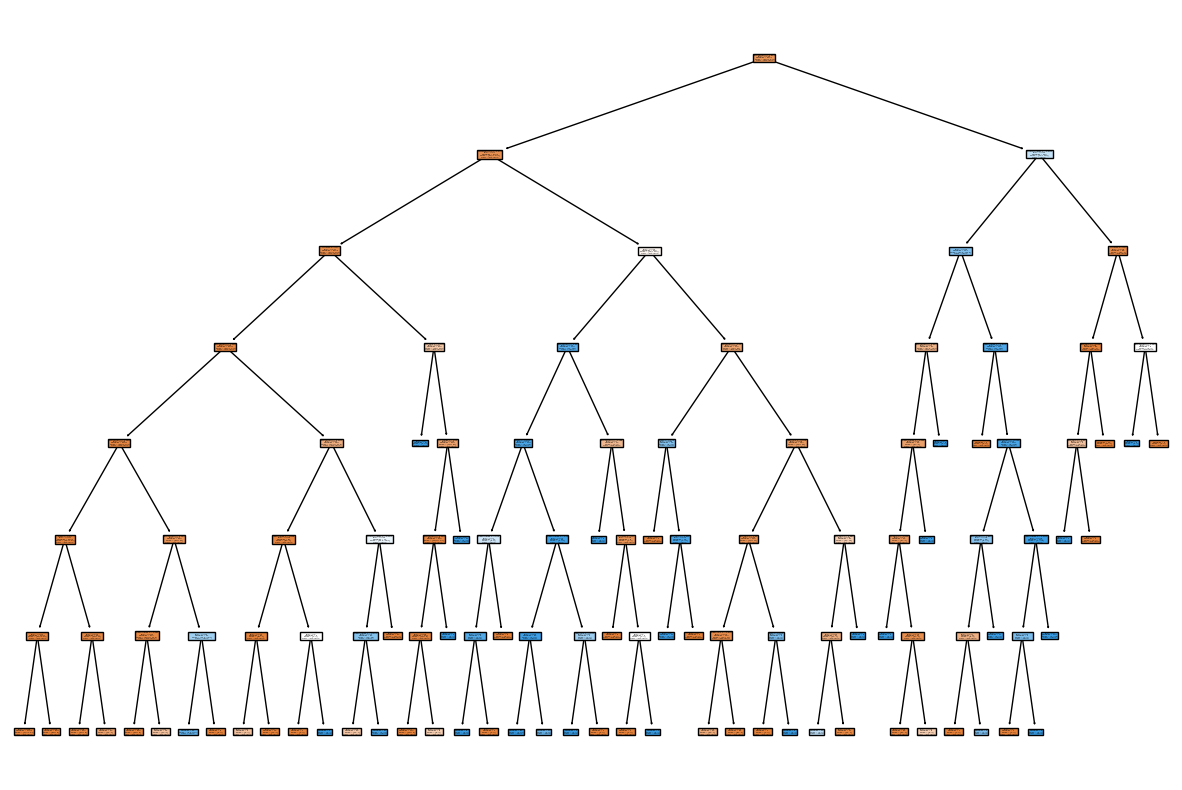

In [304]:
plt.figure(figsize=(15,10))
plot_tree(best_dt, filled=True, feature_names=x_train.columns, class_names=['Not Churn', 'Churn'])
plt.show()

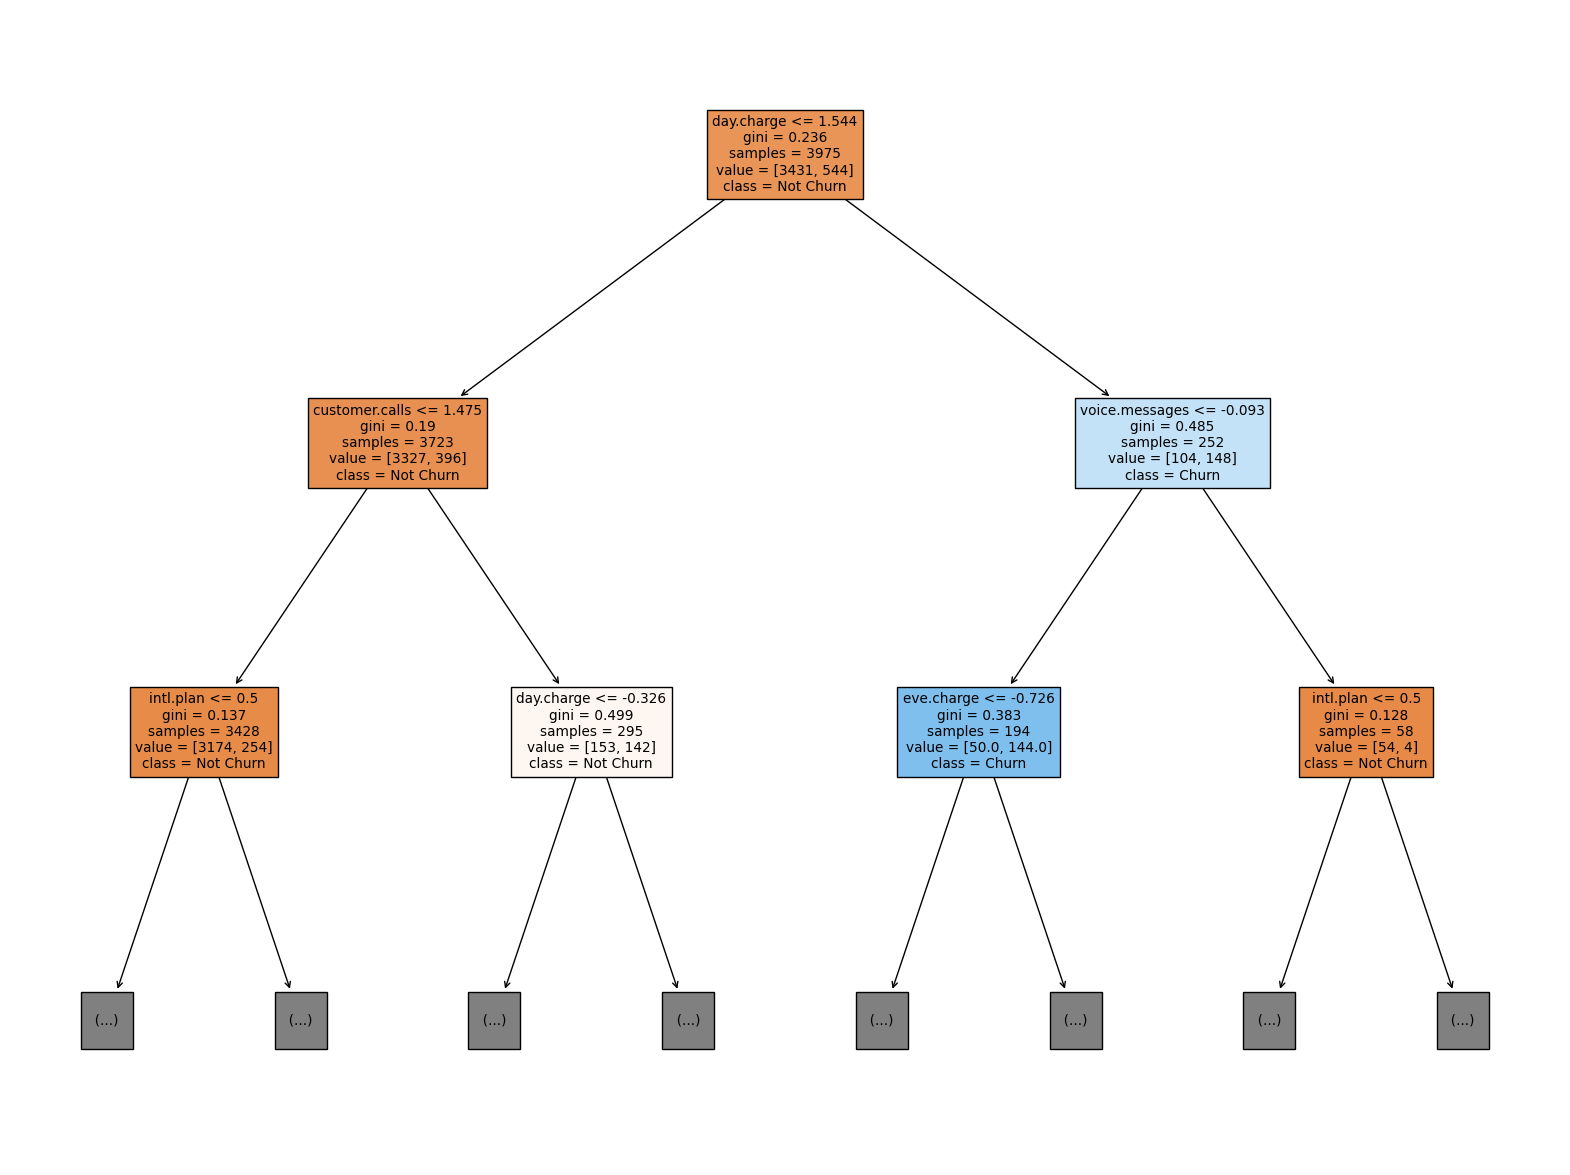

In [305]:
plt.figure(figsize=(20, 15))
plot_tree(best_dt, filled=True, feature_names=x_train.columns, class_names=['Not Churn', 'Churn'], max_depth=2)  # Limiting the depth to 3 for zooming in
plt.show()

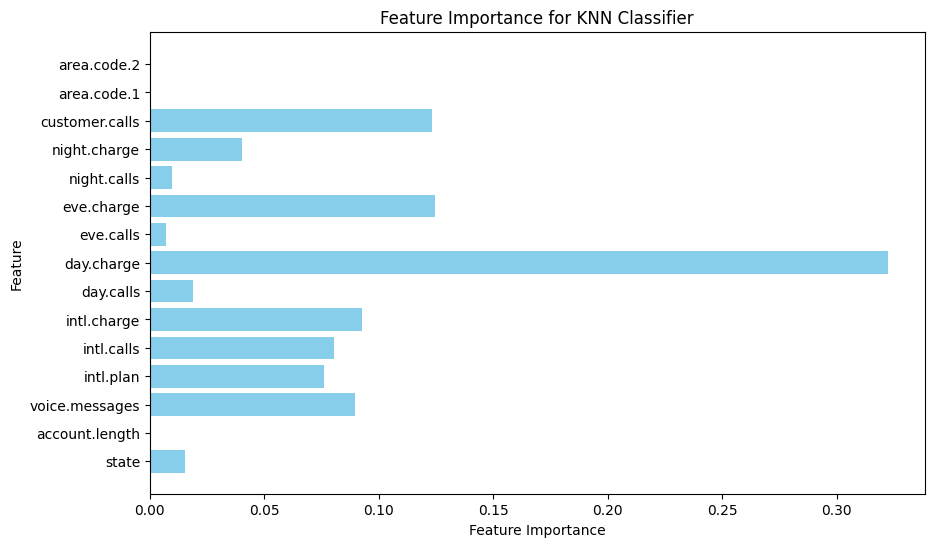

In [306]:
feature_importances = best_dt.feature_importances_

# Get feature names
feature_names = x_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances, color='skyblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for KNN Classifier')
plt.show()

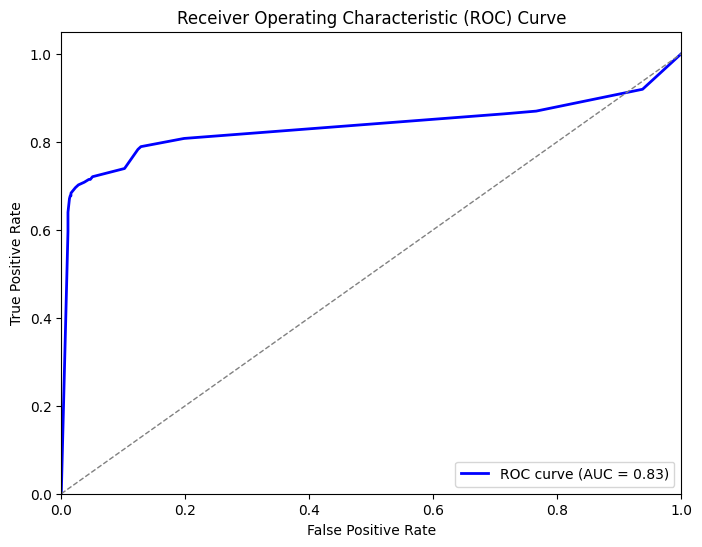

In [307]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_probs_dt = best_dt.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_dt)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#KNN

In [308]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {'n_neighbors': [1,2,3,4, 5, 7],  # number of neighbors to try
              'weights': ['uniform', 'distance'],  # weight function to use
              'metric': ['euclidean', 'manhattan']}  # distance metric to use

# Create the KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model using GridSearch
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to create and train the final KNN classifier
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'],
                                metric=best_params['metric'])
best_knn.fit(x_train, y_train)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score: 0.8918238993710691


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [309]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set using the final KNN classifier
y_pred_knn = best_knn.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

# Generate the classification report
class_report = classification_report(y_test, y_pred_knn)
print("Classification Report:")
print(class_report)


Accuracy: 0.8661971830985915
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       833
           1       0.76      0.25      0.38       161

    accuracy                           0.87       994
   macro avg       0.82      0.62      0.65       994
weighted avg       0.85      0.87      0.84       994



In [ ]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(class_report , classes=class_names, title='Confusion matrix')
plt.show()


In [311]:
# Get the indices of the nearest neighbors for a sample instance
sample_instance_index = 0  # Choose the index of the sample instance you want to inspect
sample_instance = x_test.iloc[[sample_instance_index]]

# Find the indices of the nearest neighbors
distances, indices = best_knn.kneighbors(sample_instance)

# Get the classes of the nearest neighbors
neighbor_classes = y_train.iloc[indices[0]]

print("Nearest Neighbors Indices:", indices)
print("Classes of Nearest Neighbors:", neighbor_classes)

Nearest Neighbors Indices: [[1757 3168  963]]
Classes of Nearest Neighbors: 2223    0
2370    0
1246    0
Name: churn, dtype: int64


 ### 'KNeighborsClassifier' object has no attribute 'feature_importances_'

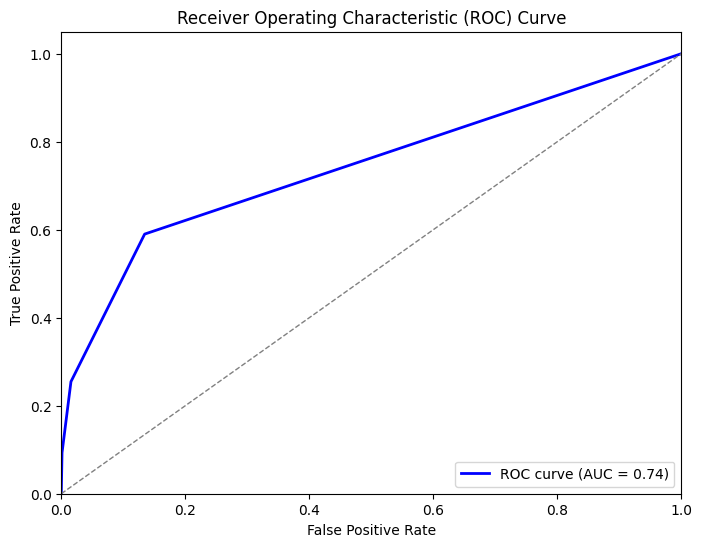

In [312]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_probs_knn = best_knn.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#Random Forest Clasifier

In [313]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200],  # number of trees in the forest
                 'max_depth': [None, 10, 20],  # maximum depth of the tree
                 'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
                 'min_samples_leaf': [1, 2, 4]}  # minimum number of samples required to be at a leaf node

# Create the Random Forest classifier
rf = RandomForestClassifier()

# Create GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1')

# Fit the model using GridSearch for Random Forest
grid_search_rf.fit(x_train, y_train)

# Get the best parameters and best score for Random Forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for Random Forest:", best_params_rf)
print("Best Score for Random Forest:", best_score_rf)

# Use the best parameters to create and train the final Random Forest classifier
best_rf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                                  max_depth=best_params_rf['max_depth'],
                                  min_samples_split=best_params_rf['min_samples_split'],
                                  min_samples_leaf=best_params_rf['min_samples_leaf'])
best_rf.fit(x_train, y_train)


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score for Random Forest: 0.7954405127621648


RandomForestClassifier(max_depth=20, min_samples_split=5)

Accuracy: 0.9446680080482898
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       833
           1       0.95      0.70      0.80       161

    accuracy                           0.94       994
   macro avg       0.95      0.84      0.89       994
weighted avg       0.94      0.94      0.94       994
 


Recall metric in the train dataset: 69.56521739130434%
Confusion matrix, without normalization
[[827   6]
 [ 49 112]]


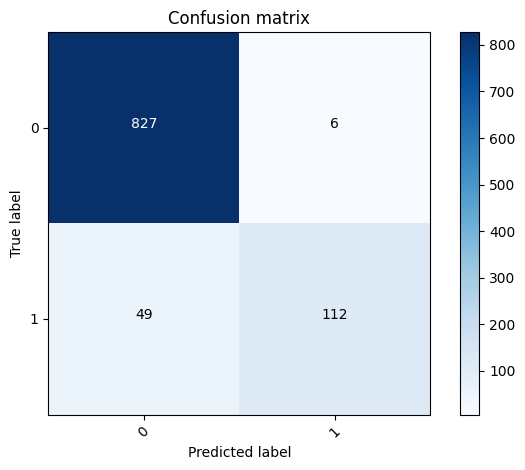

In [314]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set using the final KNN classifier
y_pred_rf = best_rf.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Generate the classification report
class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report,"\n\n")

cnf_matrix_tra = confusion_matrix(y_test, y_pred_rf)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

print("\n\n")




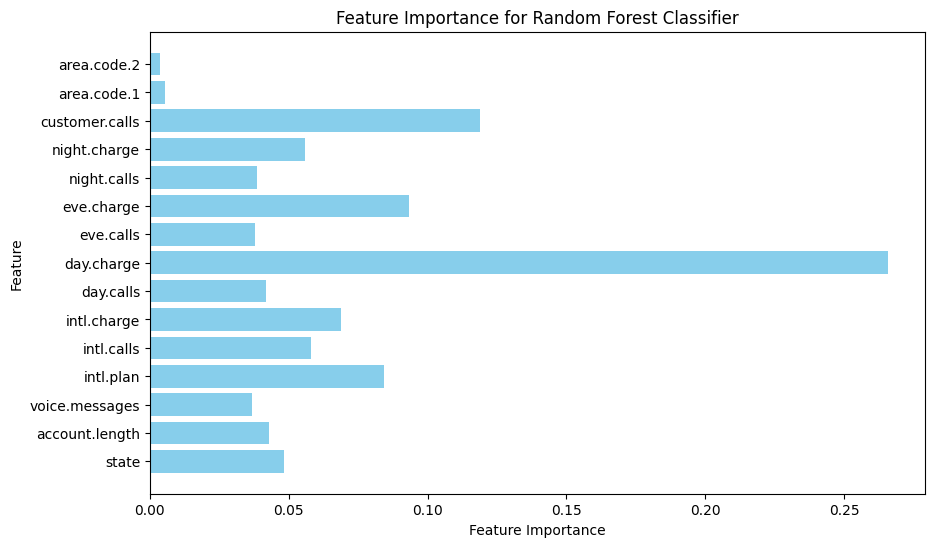

In [315]:
# Get feature importances from the trained Random Forest classifier
feature_importances = best_rf.feature_importances_

# Get feature names
feature_names = x_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances, color='skyblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()


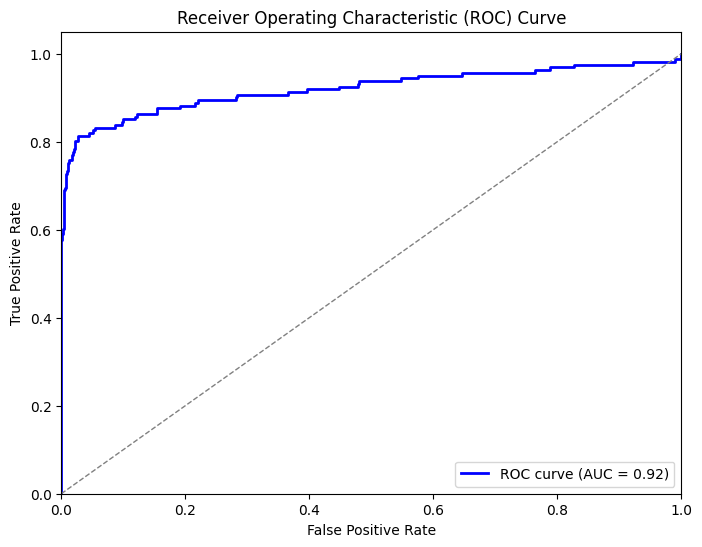

In [316]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_probs_rf = best_rf.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Gradient Boosting

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200],  # number of boosting stages to be run
                 'learning_rate': [0.01, 0.1, 0.2],  # learning rate shrinks the contribution of each tree
                 'max_depth': [3, 5, 7],  # maximum depth of the individual regression estimators
                 'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
                 'min_samples_leaf': [1, 2, 4]}  # minimum number of samples required to be at a leaf node

# Create the Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Create GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='f1')

# Fit the model using GridSearch for Gradient Boosting
grid_search_gb.fit(x_train, y_train)

# Get the best parameters and best score for Gradient Boosting
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print("Best Parameters for Gradient Boosting:", best_params_gb)
print("Best Score for Gradient Boosting:", best_score_gb)

# Use the best parameters to create and train the final Gradient Boosting classifier
best_gb = GradientBoostingClassifier(n_estimators=best_params_gb['n_estimators'],
                                     learning_rate=best_params_gb['learning_rate'],
                                     max_depth=best_params_gb['max_depth'],
                                     min_samples_split=best_params_gb['min_samples_split'],
                                     min_samples_leaf=best_params_gb['min_samples_leaf'])
best_gb.fit(x_train, y_train)


In [ ]:

from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set using the final KNN classifier
y_pred_gb = best_gb.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy)

# Generate the classification report
class_report = classification_report(y_test, y_pred_gb)
print("Classification Report:")
print(class_report,"\n\n")

cnf_matrix_tra = confusion_matrix(y_test, y_pred_gb)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

print("\n\n")




In [ ]:

# Get feature names
feature_names = x_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances, color='skyblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Gradient Boost Classifier')

# Add annotations
for i, v in enumerate(feature_importances):
    plt.text(v, i, str(round(v, 2)), color='black', va='center')

plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_probs_gb = best_gb.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_gb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# XGBM Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create the XGBoost classifier
xgb = XGBClassifier()

# Create GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='f1')

# Fit the model using GridSearch for XGBoost
grid_search_xgb.fit(x_train, y_train)

# Get the best parameters and best score for XGBoost
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best Parameters for XGBoost:", best_params_xgb)
print("Best Score for XGBoost:", best_score_xgb)

# Use the best parameters to create and train the final XGBoost classifier
best_xgb = XGBClassifier(n_estimators=best_params_xgb['n_estimators'],
                         learning_rate=best_params_xgb['learning_rate'],
                         max_depth=best_params_xgb['max_depth'],
                         min_child_weight=best_params_xgb['min_child_weight'],
                         gamma=best_params_xgb['gamma'],
                         subsample=best_params_xgb['subsample'],
                         colsample_bytree=best_params_xgb['colsample_bytree'])
best_xgb.fit(x_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set using the final XGB classifier
y_pred_xgb = best_xgb.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

# Generate the classification report
class_report = classification_report(y_test, y_pred_xgb)
print("Classification Report:")
print(class_report,"\n\n")

cnf_matrix_tra = confusion_matrix(y_test, y_pred_xgb)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

print("\n\n")




In [ ]:
feature_importances = best_xgb.feature_importances_

# Get feature names
feature_names = x_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances, color='skyblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Xtreme Gradient Boost Classifier')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_probs_xgb = best_xgb.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#SVM classifier

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid_svm = {'C': [0.1, 1, 10],  # regularization parameter
                  'kernel': ['linear', 'rbf'],  # kernel function
                  'gamma': ['scale', 'auto']}  # kernel coefficient

# Create the SVM classifier
svm = SVC()

# Create GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='f1')

# Fit the model using GridSearch for SVM
grid_search_svm.fit(x_train, y_train)

# Get the best parameters and best score for SVM
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters for SVM:", best_params_svm)
print("Best Score for SVM:", best_score_svm)



In [ ]:
# Use the best parameters to create and train the final SVM classifier
best_svm = SVC(C=best_params_svm['C'],
               kernel=best_params_svm['kernel'],
               gamma=best_params_svm['gamma'],probability =True)
best_svm.fit(x_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set using the final KNN classifier
y_pred_svm = best_svm.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

# Generate the classification report
class_report = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(class_report,"\n\n")

cnf_matrix_tra = confusion_matrix(y_test, y_pred_svm)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

print("\n\n")




####AttributeError: coef_ is only available when using a linear kernel


In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
result = permutation_importance(best_svm, x_test, y_test, n_repeats=10, random_state=42)

# Get feature importances and names
feature_importances = result.importances_mean
feature_names = x_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances, color='skyblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for SVM Classifier')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_probs_svm = best_svm.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Gaussian Naive bayes Classifier

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the parameter grid for Gaussian Naive Bayes
param_grid_nb = {
    # Gaussian Naive Bayes does not have hyperparameters to tune
}

# Create the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Create GridSearchCV for Gaussian Naive Bayes
grid_search_nb = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, cv=5, scoring='f1')

# Fit the model using GridSearch for Gaussian Naive Bayes
grid_search_nb.fit(x_train, y_train)

# Get the best parameters and best score for Gaussian Naive Bayes
best_params_nb = grid_search_nb.best_params_
best_score_nb = grid_search_nb.best_score_

print("Best Parameters for Gaussian Naive Bayes:", best_params_nb)
print("Best Score for Gaussian Naive Bayes:", best_score_nb)

# Use the best parameters to create and train the final Gaussian Naive Bayes classifier
best_nb = GaussianNB()
best_nb.fit(x_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set using the final NB classifier
y_pred_nb = best_nb.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

# Generate the classification report
class_report = classification_report(y_test, y_pred_nb)
print("Classification Report:")
print(class_report,"\n\n")

cnf_matrix_tra = confusion_matrix(y_test, y_pred_nb)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

print("\n\n")




The Naive Bayes Classifier does not have a feature_importances_ attribute like tree-based models.

Naive Bayes models calculate probabilities based on the training data and make predictions using Bayes' theorem. Therefore, they do not inherently provide feature importances as seen in models like Decision Trees or Random Forests.

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_probs_nb = best_nb.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_nb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Yes, you can use Gaussian Naive Bayes (GNB) for classification even if XGBoost (XGB) provides a higher accuracy. However, it's important to note that the performance of GNB may not always match that of more complex models like XGB, especially if the data has complex relationships or interactions that GNB cannot capture.

Here are some points to consider when deciding whether to use GNB:

1. **Simplicity vs. Complexity**: GNB is a simple and fast algorithm that assumes independence between features. It's suitable for relatively small datasets and situations where feature independence holds. On the other hand, XGB is a more complex algorithm that can capture non-linear relationships and interactions between features.

2. **Interpretability**: GNB provides straightforward interpretability because it's based on the assumption of feature independence. This makes it easier to understand how individual features contribute to the classification decision. XGB, while powerful, may not be as interpretable due to its complexity.

3. **Performance**: While XGB may provide higher accuracy on many datasets, GNB can still be useful in scenarios where computational resources are limited or when interpretability is a priority. Additionally, GNB can serve as a baseline model for comparison with more complex algorithms.

4. **Data Characteristics**: GNB works well with continuous or normally distributed data. If your data meets these assumptions and the classes are well-separated, GNB can perform reasonably well. However, if the data has complex relationships or non-linear boundaries between classes, XGB or other more sophisticated algorithms may be more appropriate.

In summary, while GNB may not always match the accuracy of XGB, it can still be a useful and efficient algorithm for classification tasks, especially in scenarios where interpretability or computational resources are important considerations. It's essential to evaluate the performance of both algorithms on your specific dataset and consider the trade-offs between simplicity, interpretability, and accuracy.

#Final Verdict

In [ ]:
# Update the model_scores dictionary with y_test instead of y_true
model_scores = {
    'Logistic Regression': (accuracy_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr, average='weighted')),
    'Decision Tree': (accuracy_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt, average='weighted')),
    'KNeighborsClassifier': (accuracy_score(y_test, y_pred_knn), f1_score(y_test, y_pred_knn, average='weighted')),
    'GaussianNB': (accuracy_score(y_test, y_pred_nb), f1_score(y_test, y_pred_nb, average='weighted')),
    'SVC': (accuracy_score(y_test, y_pred_svm), f1_score(y_test, y_pred_svm, average='weighted')),
    'GradientBoostingClassifier': (accuracy_score(y_test, y_pred_gb), f1_score(y_test, y_pred_gb, average='weighted')),
    'RandomForestClassifier': (accuracy_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf, average='weighted')),
    'XBGClassifier': (accuracy_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb, average='weighted'))
}

# Define a function to calculate a composite score based on accuracy and F1-score
def calculate_composite_score(name_of_clasifier,accuracy, f1):
    print(f"Model : {name_of_clasifier} \n Weighted  Accuracy : {accuracy} \n F1-score : {f1}  \n Score : {0.6 * accuracy + 0.4 * f1}  \n \n")
    return 0.6 * accuracy + 0.4 * f1  # You can adjust the weights based on your preference



# Find the best model based on the composite score
best_model_composite = max(model_scores, key=lambda x: calculate_composite_score(x,model_scores[x][0], model_scores[x][1]))

# Print the best model based on the composite score
print("Best Model based on Composite Score:", best_model_composite)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the models and their scores
models = ['Logistic Regression', 'Decision Tree', 'KNeighborsClassifier', 'GaussianNB', 'SVC',
          'GradientBoostingClassifier', 'RandomForestClassifier', 'XBGClassifier']
composite_scores = [0.8287519740691325, 0.9341778369749011, 0.8844181324319988, 0.8394661743554241,
                    0.8916584583863795, 0.9489691005273864, 0.941416177629488, 0.9468626002373945]

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=composite_scores, y=models, palette='viridis')

# Annotate the highest bar with its score value
highest_score = max(composite_scores)
highest_index = composite_scores.index(highest_score)
ax.annotate(f'Highest Score: {highest_score:.4f}',
            xy=(highest_score, highest_index),
            xytext=(5, 0),
            textcoords='offset points',
            ha='left',
            va='center',
            color='black',
            fontsize=12)

# Add labels and title
plt.xlabel('Composite Score')
plt.ylabel('Model')
plt.title('Composite Scores of Different Models')

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predefined professional colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Extract model names, accuracy, F1-score, and calculate composite scores
model_names = list(model_scores.keys())
accuracy_scores = [model_scores[model][0] for model in model_names]
f1_scores = [model_scores[model][1] for model in model_names]
composite_scores = [calculate_composite_score(model, accuracy, f1) for model, accuracy, f1 in zip(model_names, accuracy_scores, f1_scores)]

# Plotting individual bars with professional colors and annotations
barWidth = 0.25
r1 = np.arange(len(model_names))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(12, 6))
bars1 = plt.bar(r1, accuracy_scores, color=colors[0], width=barWidth, edgecolor='white', label='Accuracy')
bars2 = plt.bar(r2, f1_scores, color=colors[1], width=barWidth, edgecolor='white', label='F1-score')
bars3 = plt.bar(r3, composite_scores, color=colors[2], width=barWidth, edgecolor='white', label='Composite Score')

# Add annotations for each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(model_names))], model_names, rotation=45)
plt.ylabel('Scores', fontweight='bold')
plt.title('Scores of Different Models', fontweight='bold')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predefined professional colors for the bars and lines
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Extract model names, accuracy, F1-score, and calculate composite scores
model_names = list(model_scores.keys())
accuracy_scores = [model_scores[model][0] for model in model_names]
f1_scores = [model_scores[model][1] for model in model_names]
composite_scores = [calculate_composite_score(model, accuracy, f1) for model, accuracy, f1 in zip(model_names, accuracy_scores, f1_scores)]

plt.figure(figsize=(12, 6))

# Plot line charts for F1 score and accuracy
plt.plot(model_names, f1_scores, marker='o', color=colors[1], label='F1 Score', linewidth=2)
plt.plot(model_names, accuracy_scores, marker='o', color=colors[0], label='Accuracy', linewidth=2)

# Plot bar chart for composite score
barWidth = 0.25
r = np.arange(len(model_names))
plt.bar(r, composite_scores, color=colors[2], width=barWidth, edgecolor='white', label='Composite Score')

# Add annotations for each bar
for bar in composite_scores:
    height = bar
    plt.text(r[composite_scores.index(bar)], height + 0.01, round(height, 2), ha='center')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Scores of Different Models', fontweight='bold')
plt.xticks(r, model_names, rotation=45)
plt.legend()

plt.show()

# Dumping into Pickle

In [ ]:
print("Random Classifier it is!")

In [ ]:
import pickle

In [ ]:
pickle.dump(best_gb,open('/content/best_gb_telecom',"wb"))

In [ ]:
loaded_model = pickle.load(open("/content/best_gb_telecom","rb"))

In [ ]:
loaded_model.predict(x_test)

In [ ]:
# Get feature importances from the trained Gradient Boosting classifier
feature_importances = loaded_model.feature_importances_

# Get feature names
feature_names = x_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances, color='skyblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Gradient Boosting Classifier')

# Add annotations
for i, importance in enumerate(feature_importances):
    plt.text(importance, i, f'{importance:.2f}', ha='left', va='center', color='black')

plt.show()


In [ ]:
loaded_model.get_params(deep=True)

In [ ]:
loaded_model_xgbm = pickle.load(open("/content/best_xgb_telecom","rb"))

In [ ]:
# Get feature importances from the trained X-Gradient Boosting classifier
feature_importances = loaded_model_xgbm.feature_importances_

# Get feature names
feature_names = x_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances, color='skyblue')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Gradient Boosting Classifier')

# Add annotations
for i, importance in enumerate(feature_importances):
    plt.text(importance, i, f'{importance:.2f}', ha='left', va='center', color='black')

plt.show()

In [ ]:
loaded_model_xgbm.get_params(deep=True)

In [ ]:
import joblib

In [ ]:
joblib.dump(sr,"/content/data_preprocess")

In [ ]:
pre_process_scaler=joblib.load("/content/data_preprocess")

In [ ]:
pre_process_scaler.transform(df[test_scaler])